# **Проект 1. Разведочный анализ данных на примере датасета «Stack Overflow Annual Developer Survey»**

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import AutoMinorLocator

# **1. Первичный анализ данных**

Большие датасеты могут содержать много неоднородных данных, выбросов или пропущенных значений. Чтобы выполнить правильный нализ, нам нужно провести очистку данных. А чтобы провести очистку данных, надо узнать, что чистить. Сравнивая медиану и среденее, можно оценить оличество выбросов. Исследуя пропущенные значения, можно избавиться от строк, где пропущенное знчение слишком важно для статистики.

In [106]:

pd.options.display.float_format = '{:.2f}'.format


df = pd.read_csv('/content/survey_results_public.csv')
df.head()

# Получение статистики describe
summary = df.describe()
summary

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,69834.00,39555.00,35874.00,39394.00
mean,34917.50,1264062697509796249315955396323327336251392.00,11.65,103906.54
std,20159.48,251402336654759565238189111762470209306230784.00,8.93,645838.99
min,1.00,0.00,0.00,1.00
25%,17459.25,64000.00,5.00,46044.00
50%,34917.50,115800.00,10.00,76085.00
75%,52375.75,230000.00,16.00,124478.75
max,69834.00,49999999999999992051087350427974655758076739584.00,50.00,74351432.00


In [107]:
#выводим количество пропущенных значений
pd.set_option('display.max_rows', None)
missing_values = df.isna().sum()
missing_values

,0
ResponseId,0
Q120,0
MainBranch,0
Age,0
Employment,947
RemoteWork,10307
CodingActivities,10346
EdLevel,892
LearnCode,1137
LearnCodeOnline,15196


**Вопрос 3.** Одинаковое количество пропущенных значений можно объяснить зависимостью между переменными. Например мы спрашиваем про мето работы а потом про опыт работы. Также некоторые вопросы могут быть обязательными и у них нулевое количество пропущенных значений.

**Вопрос 4.** Для работы с пропущенными значениями есь несколько методов: просто их удалять, заменять средним значением - что логично (не меняет среднее), по такой же логике иногда заполняют медианным значением. Это для числовых. А вот строковые можно заменять наболее часто стречающимися значениями. Ну либо на основе значений других колонок можно попытаться угадать что человек бы ответил.**Текст, выделенный полужирным шрифтом**

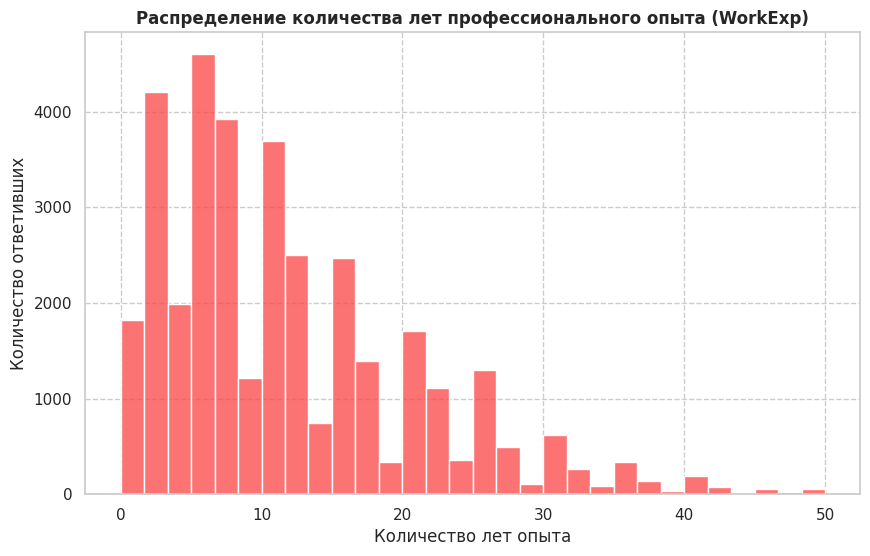

In [108]:
#посмотрим на распределение количества лет профессионального опыта (WorkExp)
plt.figure(figsize=(10, 6))
sns.histplot(df['WorkExp'], bins=30, color = '#FC4445')
plt.title('Распределение количества лет профессионального опыта (WorkExp)', fontweight = 'bold')
plt.xlabel('Количество лет опыта')
plt.ylabel('Количество ответивших')
plt.grid(True, linestyle = '--')
plt.show()

Мы имееем дело в основном с людьми с опытом 1-15 лет. Причем преобладают люди с опытом около 5 лет, то есть данным можно доверять, так как их предоставляют довольно знающие люди.

In [109]:
value = summary['CompTotal'].iloc[1]
print(f"{value:.2f}")

1264062697509796249315955396323327336251392.00


Text(0.5, 1.0, 'Boxplotы по размерам заработной платы в изначальной валюте и после конвертации')

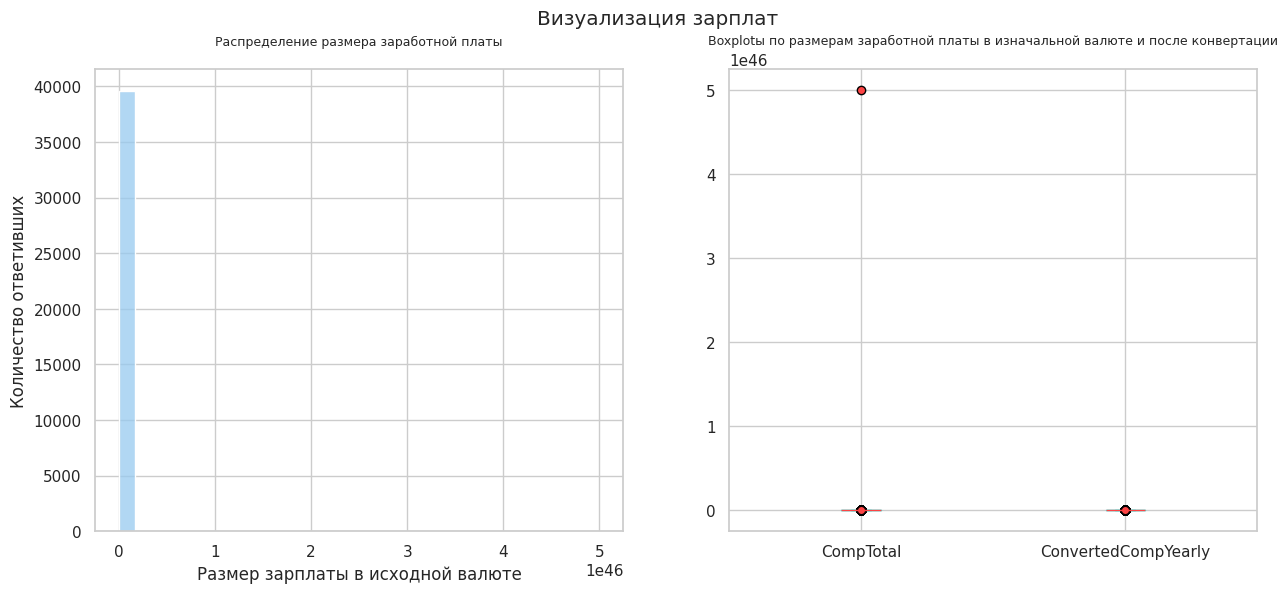

In [110]:
#графики для лучшей визуализации данных
fig, axes = plt.subplots(1, 2, figsize = (15, 6))

fig.suptitle('Визуализация зарплат')

sns.histplot(df['CompTotal'], bins=30, color = '#97CAEF', ax = axes[0])
axes[0].set_title('Распределение размера заработной платы', fontsize = 9, pad = 17)
axes[0].set_ylabel('Количество ответивших')
axes[0].set_xlabel('Размер зарплаты в исходной валюте')

boxprops = dict(color='#3FEEE6')
whiskerprops = dict(color='#3FEEE6')
capprops = dict(color='#3FEEE6')
medianprops = dict(color='#FC4445')
flierprops = dict(markerfacecolor='#FC4445')

df[['CompTotal', 'ConvertedCompYearly']].plot(kind='box', ax=axes[1], boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops, flierprops=flierprops)
axes[1].set_title('Boxplotы по размерам заработной платы в изначальной валюте и после конвертации', fontsize = 9, loc = 'center')


**Вопрос 1.** Видим большие выбросы в колонке Comptotal, которые мешают оценить ситуацию в среднем. Именно из-за них среднее сильно больше медианы, ведь выбросы оказывают сильное влияние именно на среднее значение, не затрагивая особо медиану. Такая разница показывает неоднородность данных и нам необходимо почистить их. Сделаем это.

**Вопрос 2.** Также большая разница в нашем случае может наблюдпться из-за большой неоднородности значений в разной валюте, где-то 1000 - большая зарплата, а где-то 1000000 - маленькая. Если говорить в общем, то причиной также может послужить нессиметричное распределение данных, например очень много маленьких значений по сравнению с количеством больших.

       ResponseId  CompTotal  WorkExp  ConvertedCompYearly
count    35712.00   35712.00 24211.00             35563.00
mean     34294.77  159768.39    11.95             98850.24
std      19670.74  172306.75     8.88             79400.31
min          2.00       0.00     0.00                 1.00
25%      17856.75   60000.00     5.00             50000.00
50%      33432.50  100000.00    10.00             80317.00
75%      50504.25  180000.00    16.00            129000.00
max      69833.00  999999.00    50.00           1069822.00


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


Text(0.5, 1.0, 'Boxplot для размера зарплаты')

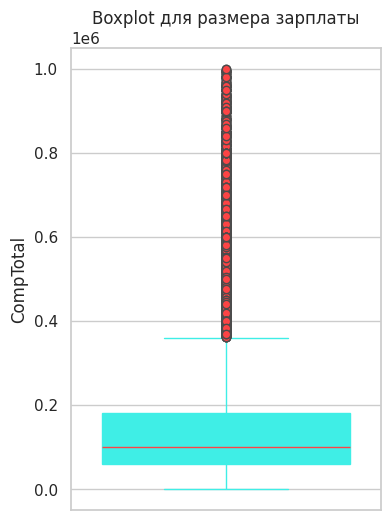

In [111]:
df2 = df[df["CompTotal"] < 1000000] # подобрала так чтобы медиану на boxplot было видно
summary2 = df2.describe()
print(summary2)

plt.figure(figsize=(4, 6))

sns.boxplot(data=df2['CompTotal'], boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops, flierprops=flierprops)
plt.title('Boxplot для размера зарплаты') #нужен для меня, чтобы понять какую границу на CompTotal поставить, чтобы график был читаемым

In [112]:
print(summary2['ConvertedCompYearly'].iloc[1])

98850.2408683182


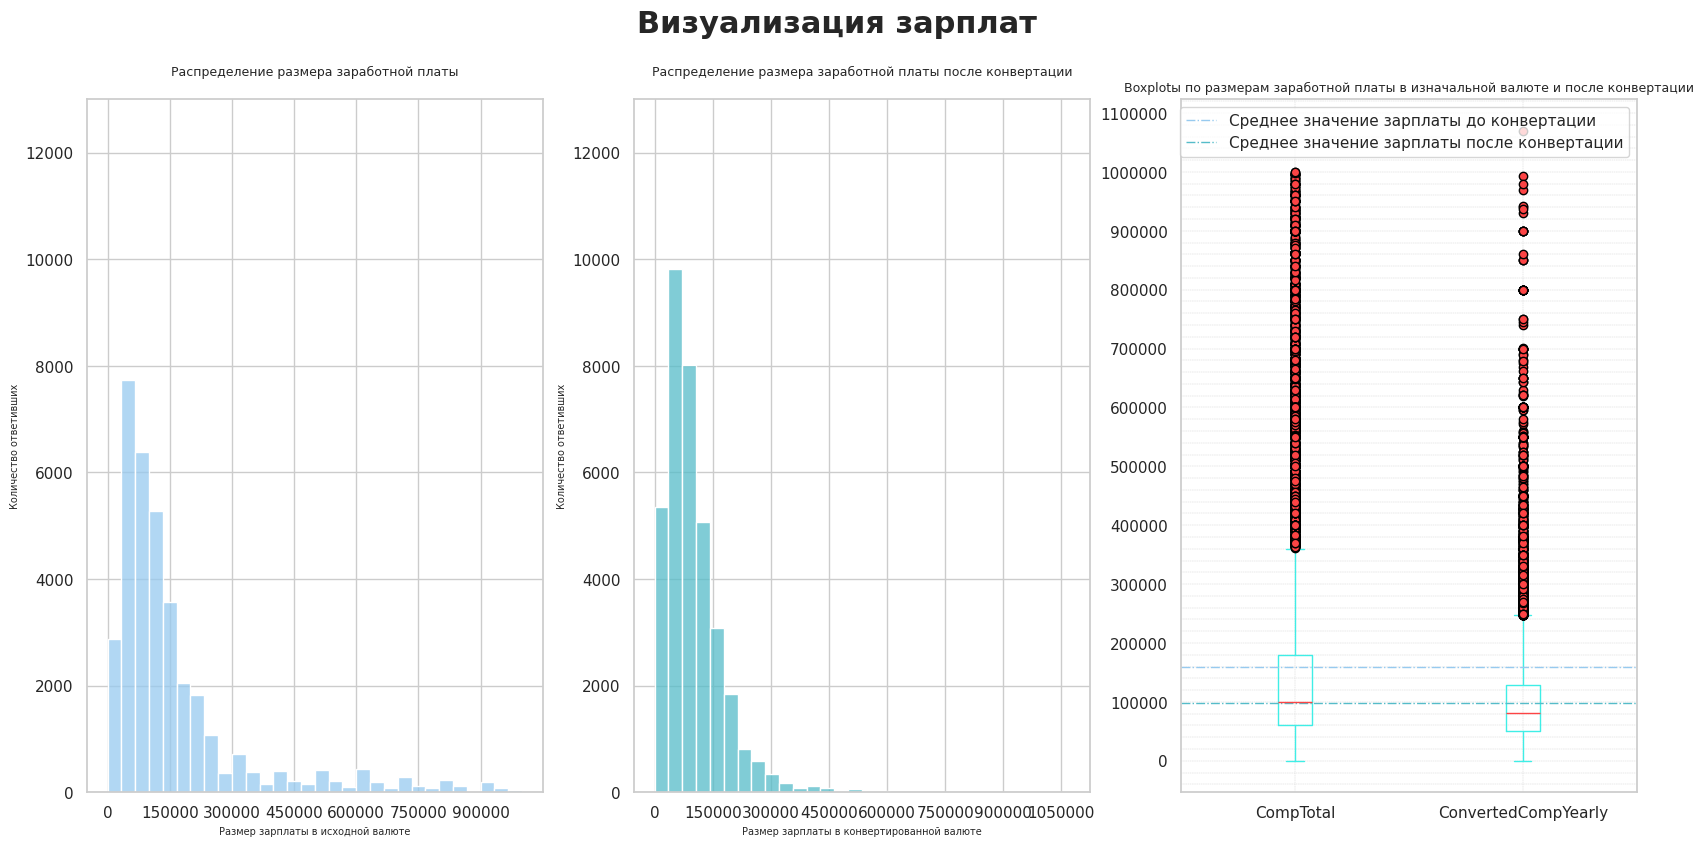

In [113]:
fig, axes = plt.subplots(1, 3, figsize = (20, 9))

fig.suptitle('Визуализация зарплат', fontsize = 22, fontweight = 'bold')

sns.histplot(df2['CompTotal'], bins=30, color = '#97CAEF', ax = axes[0])
axes[0].set_title('Распределение размера заработной платы', fontsize = 9, pad = 17)
axes[0].set_ylabel('Количество ответивших', fontsize = 7)
axes[0].set_xlabel('Размер зарплаты в исходной валюте', fontsize = 7)
axes[0].xaxis.set_major_locator(plt.MultipleLocator(150000))
axes[0].xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
axes[0].ticklabel_format(style='plain', axis='x')
axes[0].set_ylim(0, 13000)


sns.histplot(df2['ConvertedCompYearly'], bins=30, color = '#55BCC9', ax = axes[1])
axes[1].set_title('Распределение размера заработной платы после конвертации', fontsize = 9, pad =17)
axes[1].set_ylabel('Количество ответивших', fontsize = 7)
axes[1].set_xlabel('Размер зарплаты в конвертированной валюте', fontsize = 7)
axes[1].xaxis.set_major_locator(plt.MultipleLocator(150000))
axes[1].xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
axes[1].ticklabel_format(style='plain', axis='x')
axes[1].set_ylim(0, 13000)

df2[['CompTotal', 'ConvertedCompYearly']].plot(kind='box', ax=axes[2], boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops, flierprops=flierprops)
axes[2].set_title('Boxplotы по размерам заработной платы в изначальной валюте и после конвертации', fontsize = 9, loc = 'center')
axes[2].yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
axes[2].ticklabel_format(style='plain', axis='y')
axes[2].yaxis.set_major_locator(plt.MultipleLocator(100000))
axes[2].yaxis.set_minor_locator(AutoMinorLocator(5))
plt.grid(True, which='both', linestyle='--', linewidth=0.3)

mean_CompTotal = summary2['CompTotal'].iloc[1]
mean_ConvertedCompYearly = summary2['ConvertedCompYearly'].iloc[1]

axes[2].axhline(y=mean_CompTotal, color='#97CAEF', linewidth = 1, linestyle = 'dashdot', label='Среднее значение зарплаты до конвертации')
axes[2].axhline(y=mean_ConvertedCompYearly, color='#55BCC9', linewidth = 1, linestyle = 'dashdot', label='Среднее значение зарплаты после конвертации')
axes[2].legend()



После очистки данных мы наконец можем приближенно оценить среднее по зарплатам. На боксплоте можем увидеть, что теперь среднее и медиана плюс-минус приближены. Для конвертированной зарплаты количество выбросов сильно меньше чем для исходной. Это легко объясняется однородностью данных, ведь теперь денежная оценка оббъективна.

**Выводы:** в данных было довольно много выбросов, я их очистила. После очистки поняла, что данные по конвертированной зарплате теперь довольно однородны, с ней и буду работать далее. Для себя приняла, что в опросе участвовали среднеопытные разработчики, а также очевидно, что в датасете очень много пропусков и их надо с умом очищать.

# **2. Визуализация пропущенных значений**

Пропущенные значения, особенно в таких важных и по сути ключевых вопросах для исследования, как зарплата и опыт работы, могут давать нерепрезентативную статистику или быть бесполезными для статистики. Их нужно очистить, чтобы проанализировать только достоверную информацию. Этия я и буду заниматься во втором разделе. А также посмотрим, где пропущенных значений больше всего и насколько сильно это влияет на данные.

In [114]:
import missingno as msno

In [115]:
missing_values #напоминаю

,0
ResponseId,0
Q120,0
MainBranch,0
Age,0
Employment,947
RemoteWork,10307
CodingActivities,10346
EdLevel,892
LearnCode,1137
LearnCodeOnline,15196


In [116]:
missing_3 = df[['WorkExp', 'CompTotal', 'ConvertedCompYearly']].isnull().sum() #я посчитала эти данные мамыми аажными и захотела почистить именно их
dolya = (missing_3 / len(df))
missing_df = pd.DataFrame({'Missing Values': missing_3,
                          'Proportion': dolya})
missing_df

,Missing Values,Proportion
WorkExp,33960,0.49
CompTotal,30279,0.43
ConvertedCompYearly,30440,0.44


/usr/local/lib/python3.10/dist-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


<Axes: title={'center': 'Матрица пропущенных значений по количеству лет профессионального опыта,\n размеру зарплаты до конверсии и размеру зарплаты после конверсии'}>

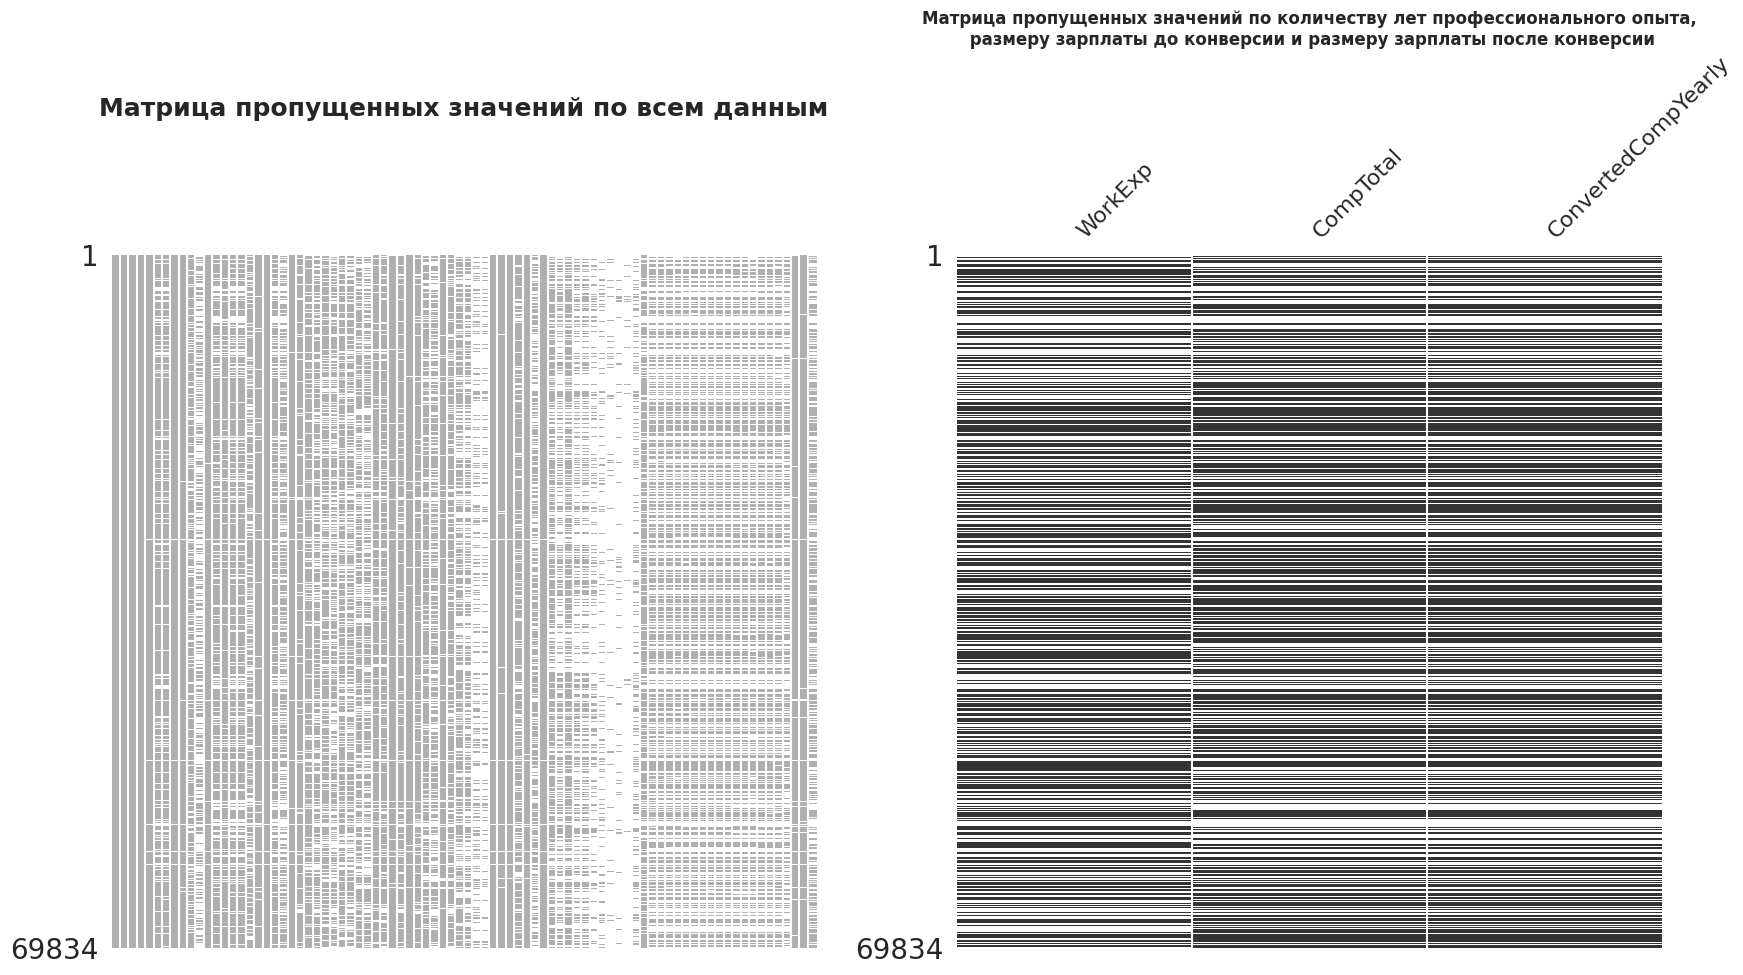

In [117]:
fig, axes = plt.subplots(1, 2, figsize = (20, 9))
msno.matrix(df, ax=axes[0], color = (0.69, 0.69, 0.69))
axes[0].set_title('Матрица пропущенных значений по всем данным', pad = 100, fontweight = 'bold', fontsize = 18)
axes[1].set_title('Матрица пропущенных значений по количеству лет профессионального опыта,\n размеру зарплаты до конверсии и размеру зарплаты после конверсии', fontweight = 'bold')
msno.matrix(df[['WorkExp', 'CompTotal', 'ConvertedCompYearly']], ax=axes[1], color = (0.2, 0.2, 0.2))

В общей матрице огромное количество пропущенных значений, видны прямо почти полностью белые столбцы. В наших переменных на первый взгляд около половины пропущенных. Мы можем их убрать, будет не сильно критично – учитывая большое количество респондентов, выборка все равно будет довольно большой.

Text(0.5, 1.0, 'Матрица пропущенных значений по всем данным')

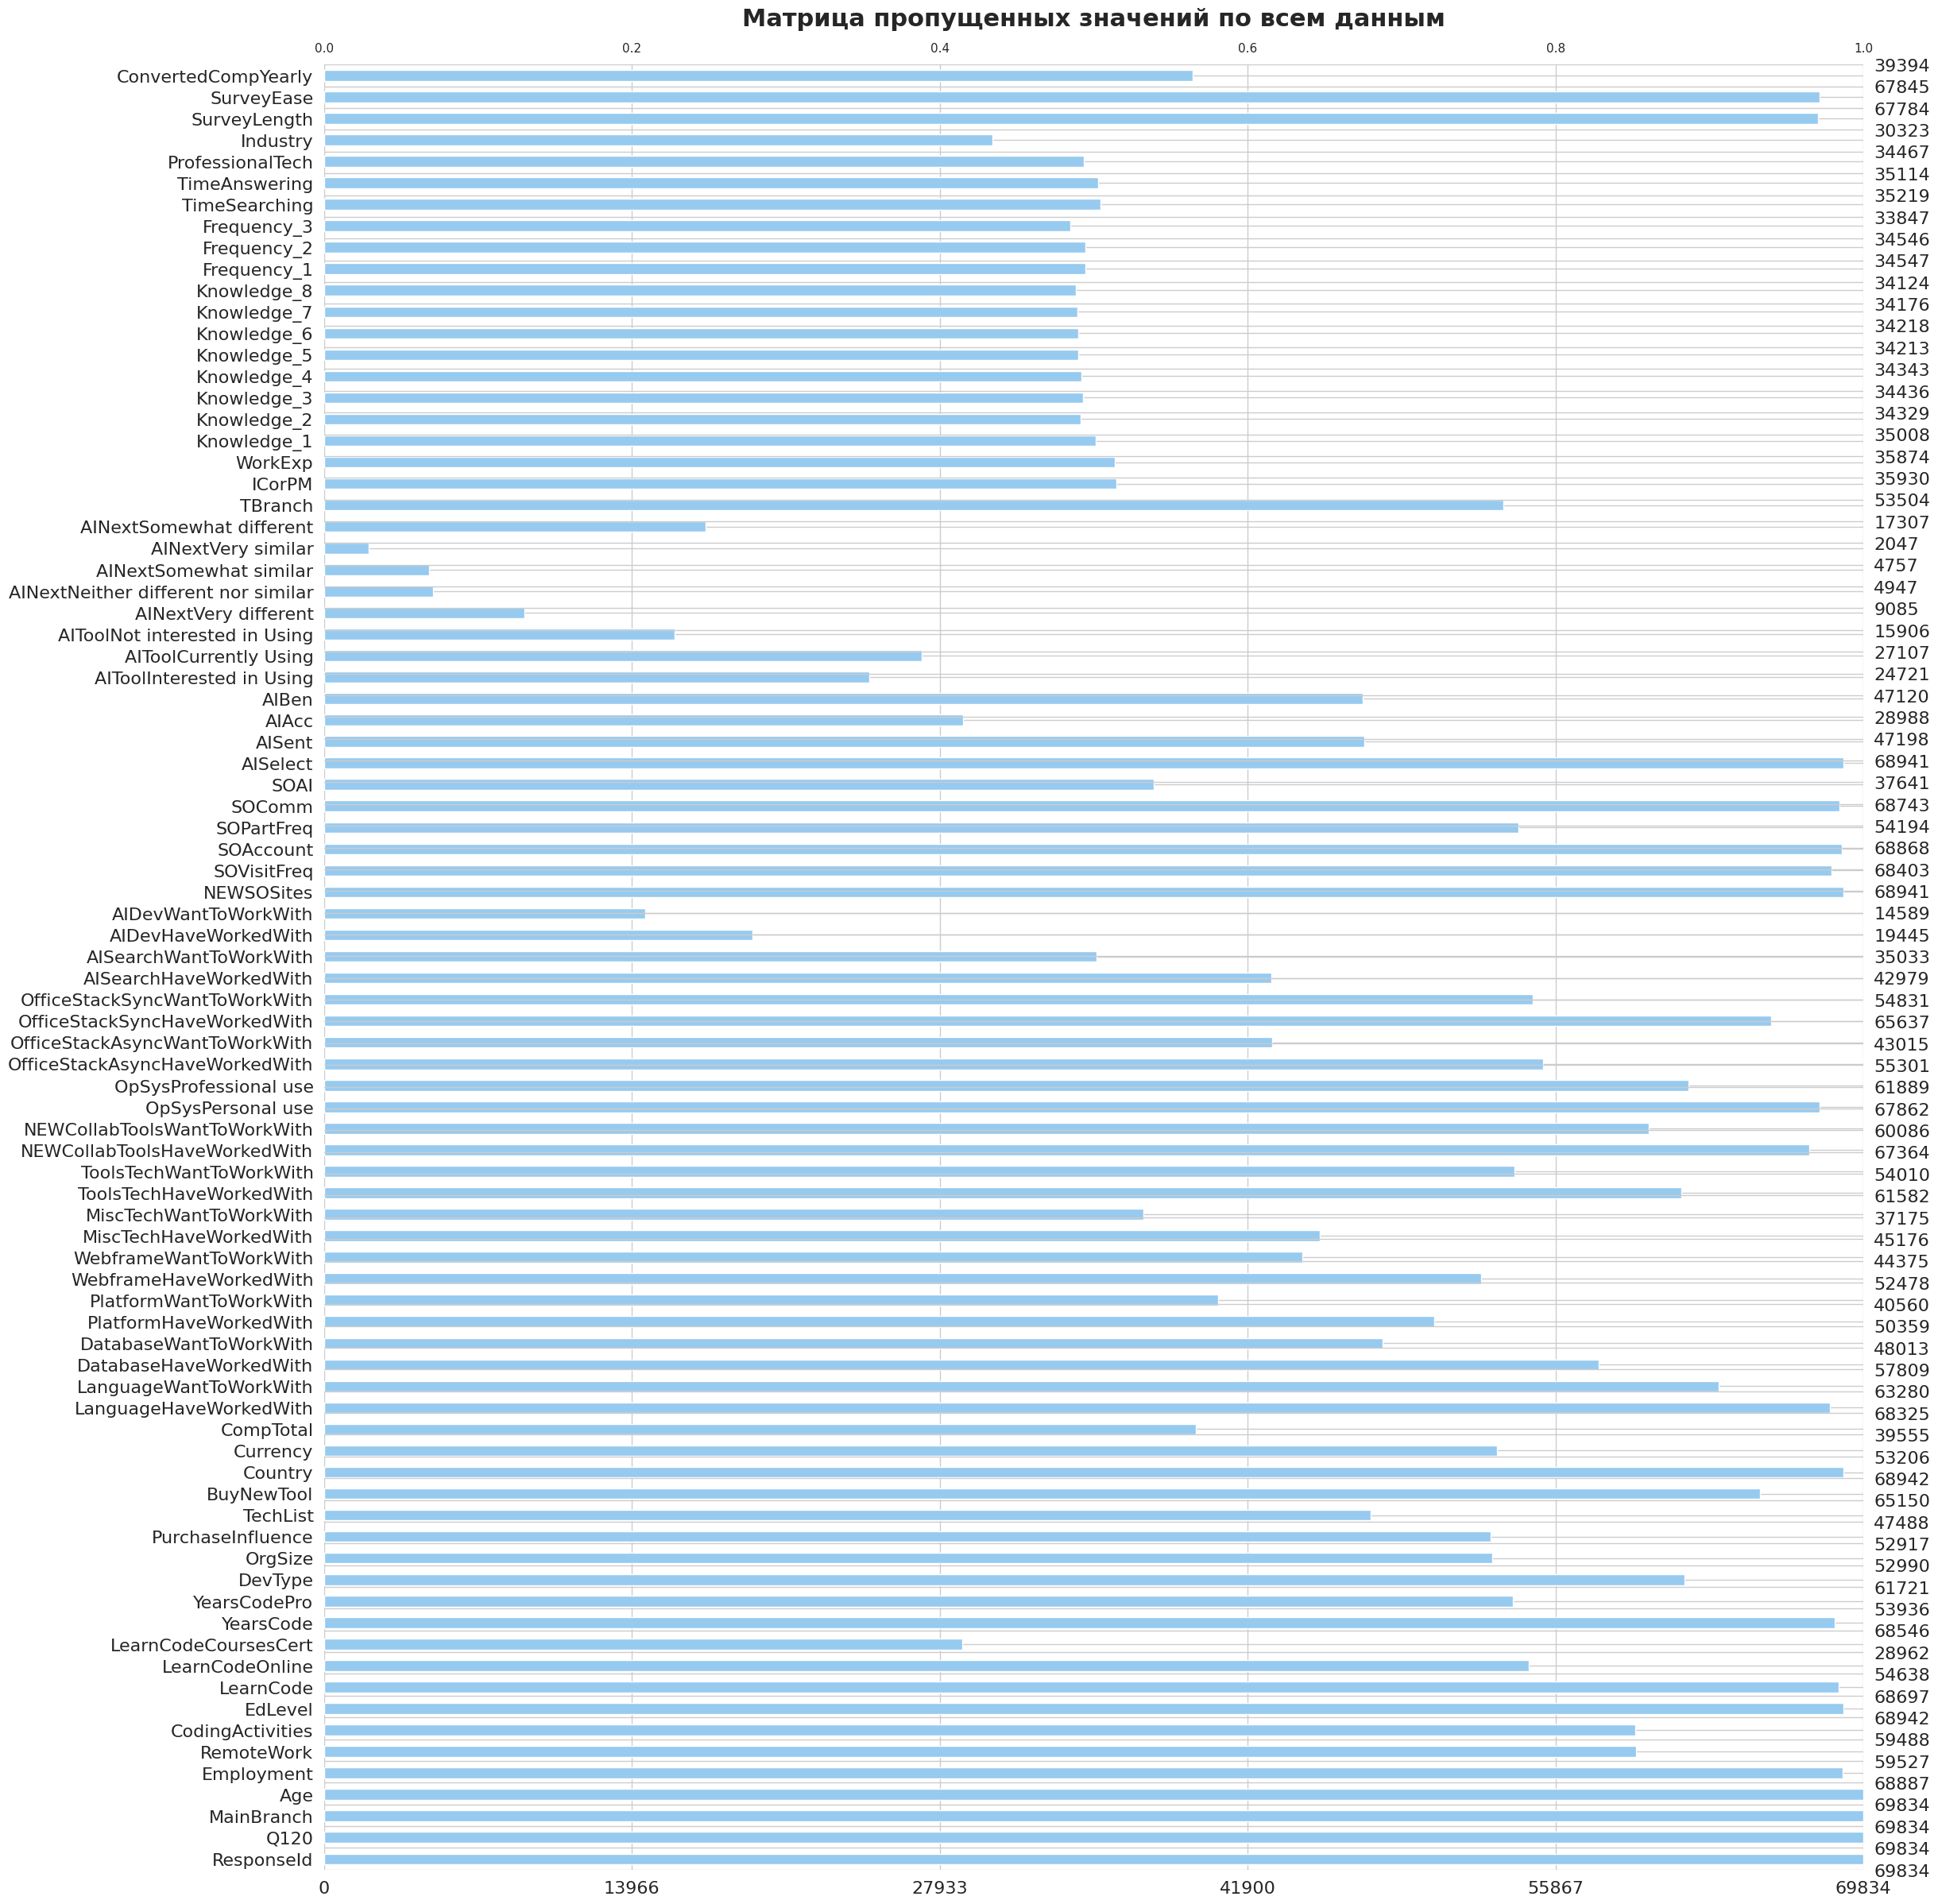

In [118]:
msno.bar(df, color = (0.592, 0.792, 0.937))
plt.title('Матрица пропущенных значений по всем данным', fontweight = 'bold', fontsize = 22, pad = 15)

Посмотрела на данные, увидела, что почти во всех столбцах больше половины пропущенных значений. Как могут помешать пропущенные значения? Мы будем анализировать данные которые не подкреплены важными характеристиками. Это может привести к смещению среднего  медианы, да и в основном аналитики хотят уидеть результаты по категориям. Как люди зарабатывают не в целом, а в зависимости от опыта работы или должности, но пропущенные значения мешают это сделать.

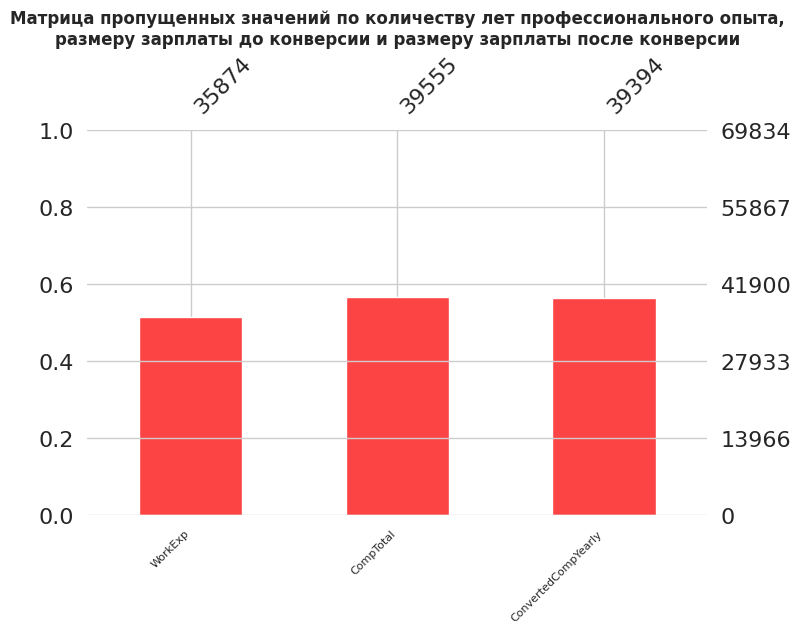

In [119]:
fig, ax = plt.subplots(figsize=(8, 5))

msno.bar(df[['WorkExp', 'CompTotal', 'ConvertedCompYearly']], ax=ax, color=(0.988, 0.267, 0.271))

ax.set_title(
    'Матрица пропущенных значений по количеству лет профессионального опыта,\n'
    'размеру зарплаты до конверсии и размеру зарплаты после конверсии',
    fontweight='bold'
)

# Добавление горизонтальной сетки
ax.yaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
ax.tick_params(axis='x', labelsize=8)

# Отображение графика
plt.show()

Первичная оценка была верна. Пропущенных значений в наших трех выбранны переменыых слегка больше половины, их очищение не будет сильно критичным.

<Axes: >

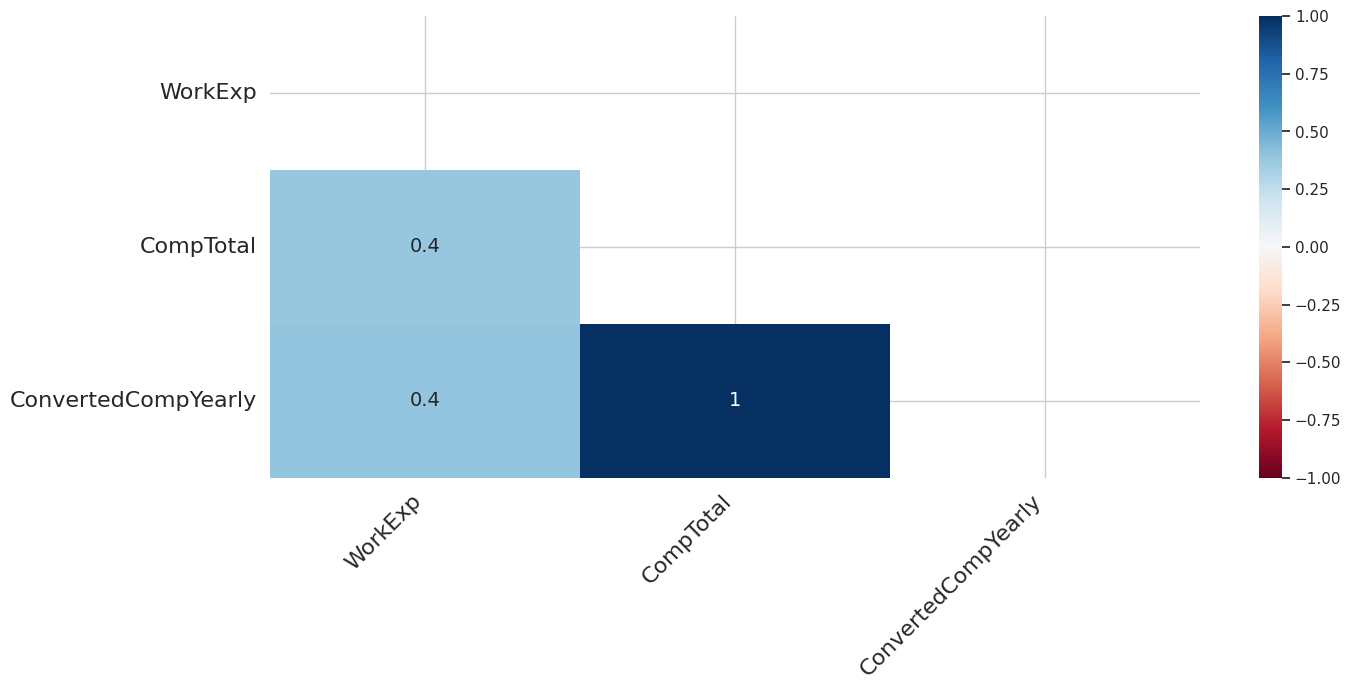

In [120]:
msno.heatmap(df[['WorkExp', 'CompTotal', 'ConvertedCompYearly']], figsize=(15,6))

Вижу, что присутствует средняя корелляция между пропусками в профессиональном опыте и пропусками в обеих зарплатах, значит они иногда зависимы. Вижу также, что корелляция между неконвертированной и конвертированной зарплатой максимальна, то есть всегда пропуск в одном ведет к пропуску в другом. Это довольно логично, ведь по сути это одно значение просто в разной валюте.

<Axes: >

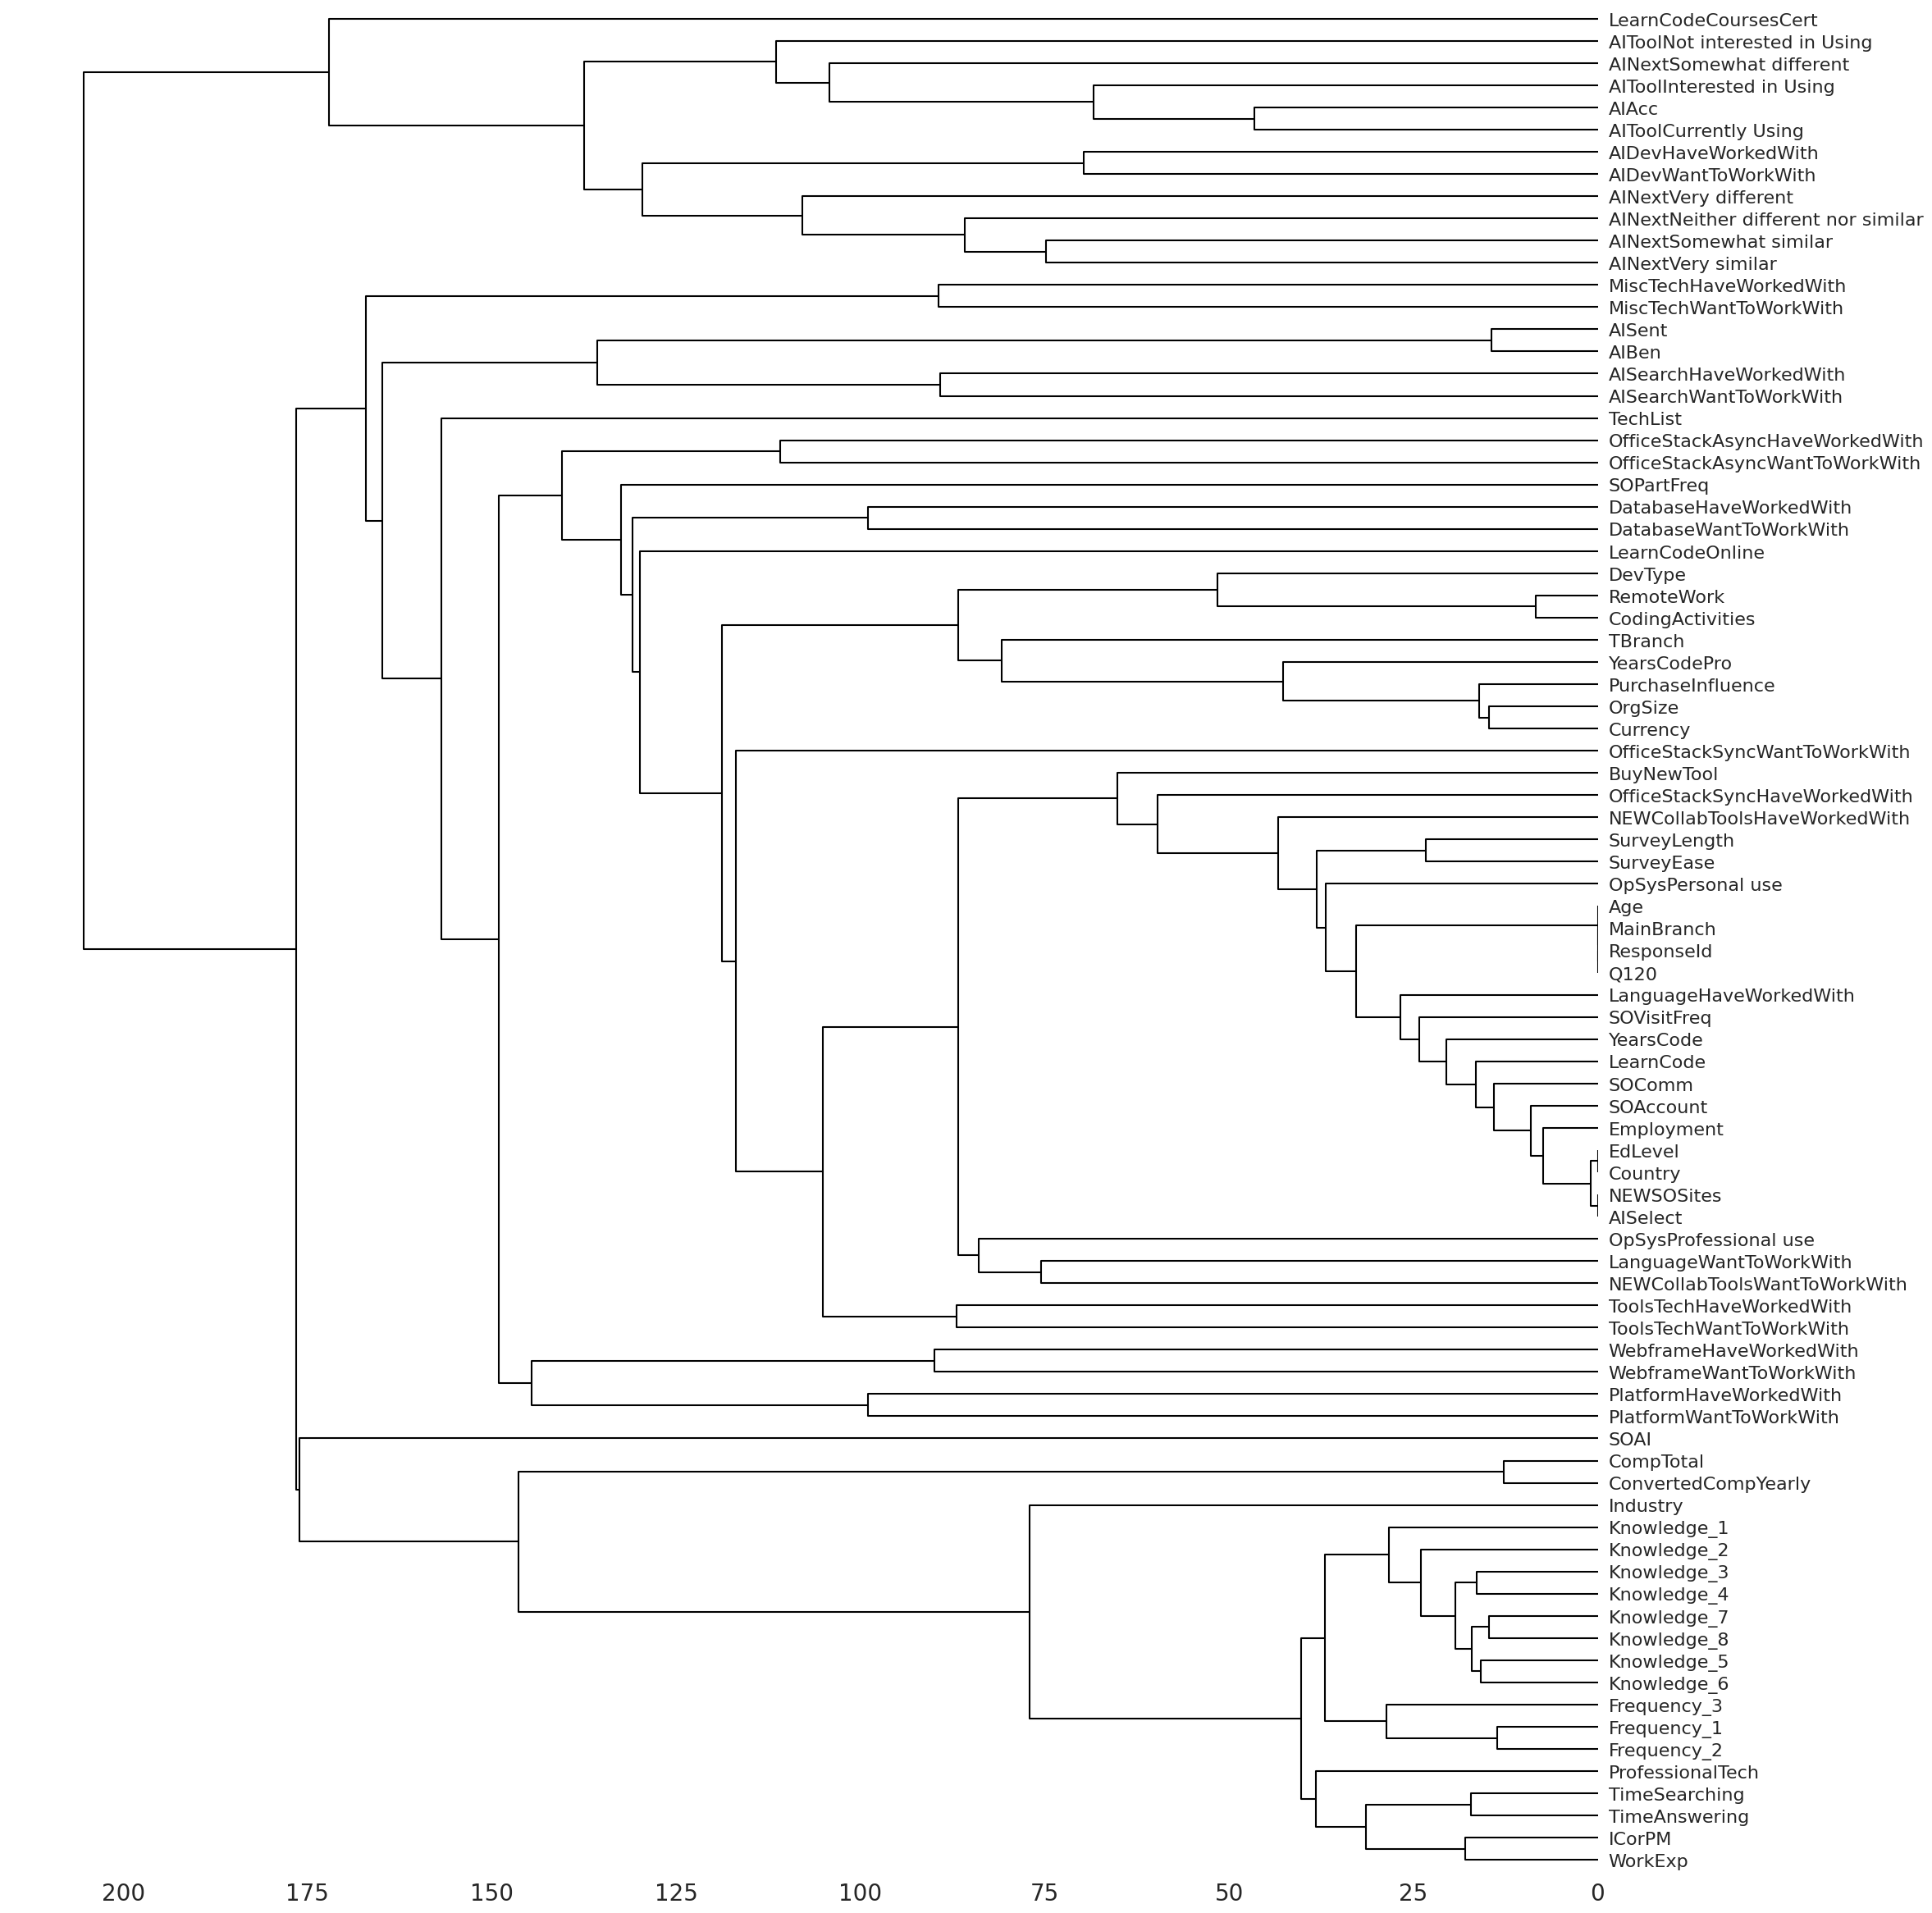

In [121]:
msno.dendrogram(df)

Видимо довольно много кластеров и, соответственно, зависимых переменных.

<Axes: >

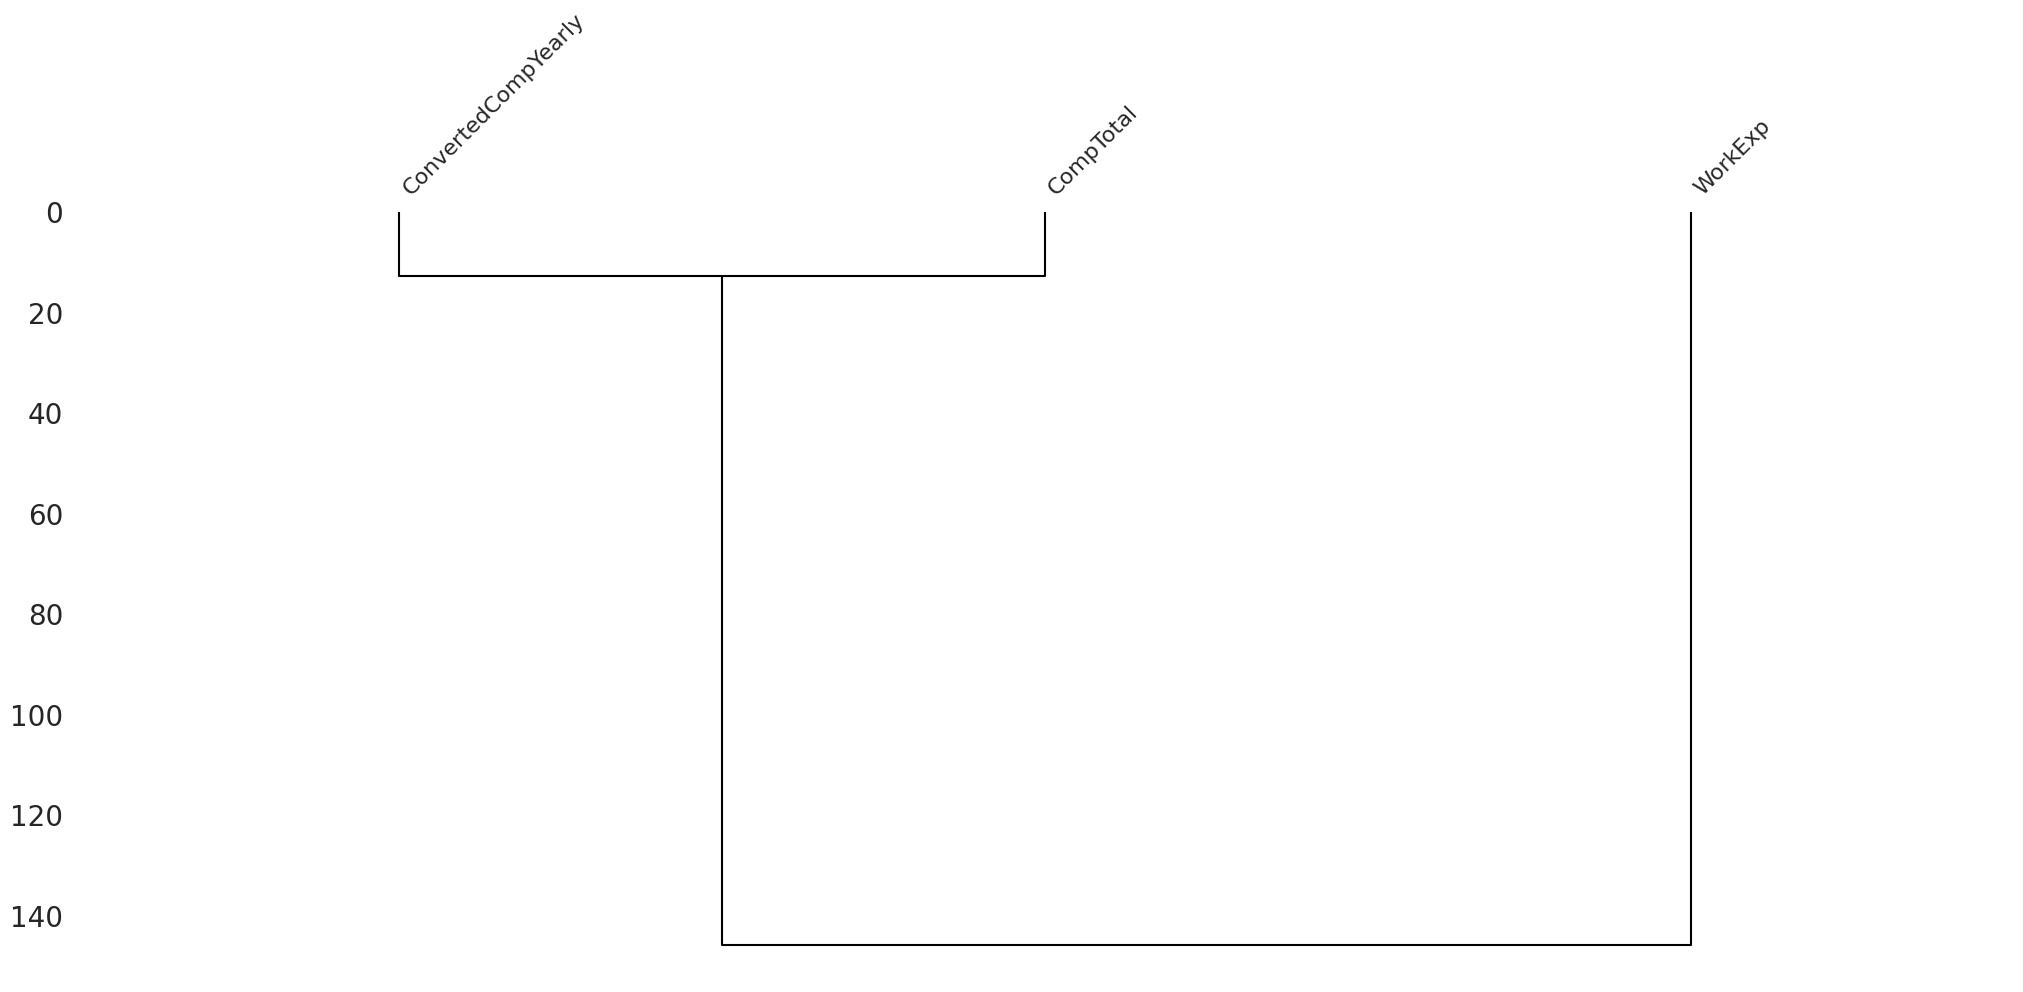

In [122]:
msno.dendrogram(df[['WorkExp', 'CompTotal', 'ConvertedCompYearly']])

Видим те же зависимости, что и на тепловой карте.

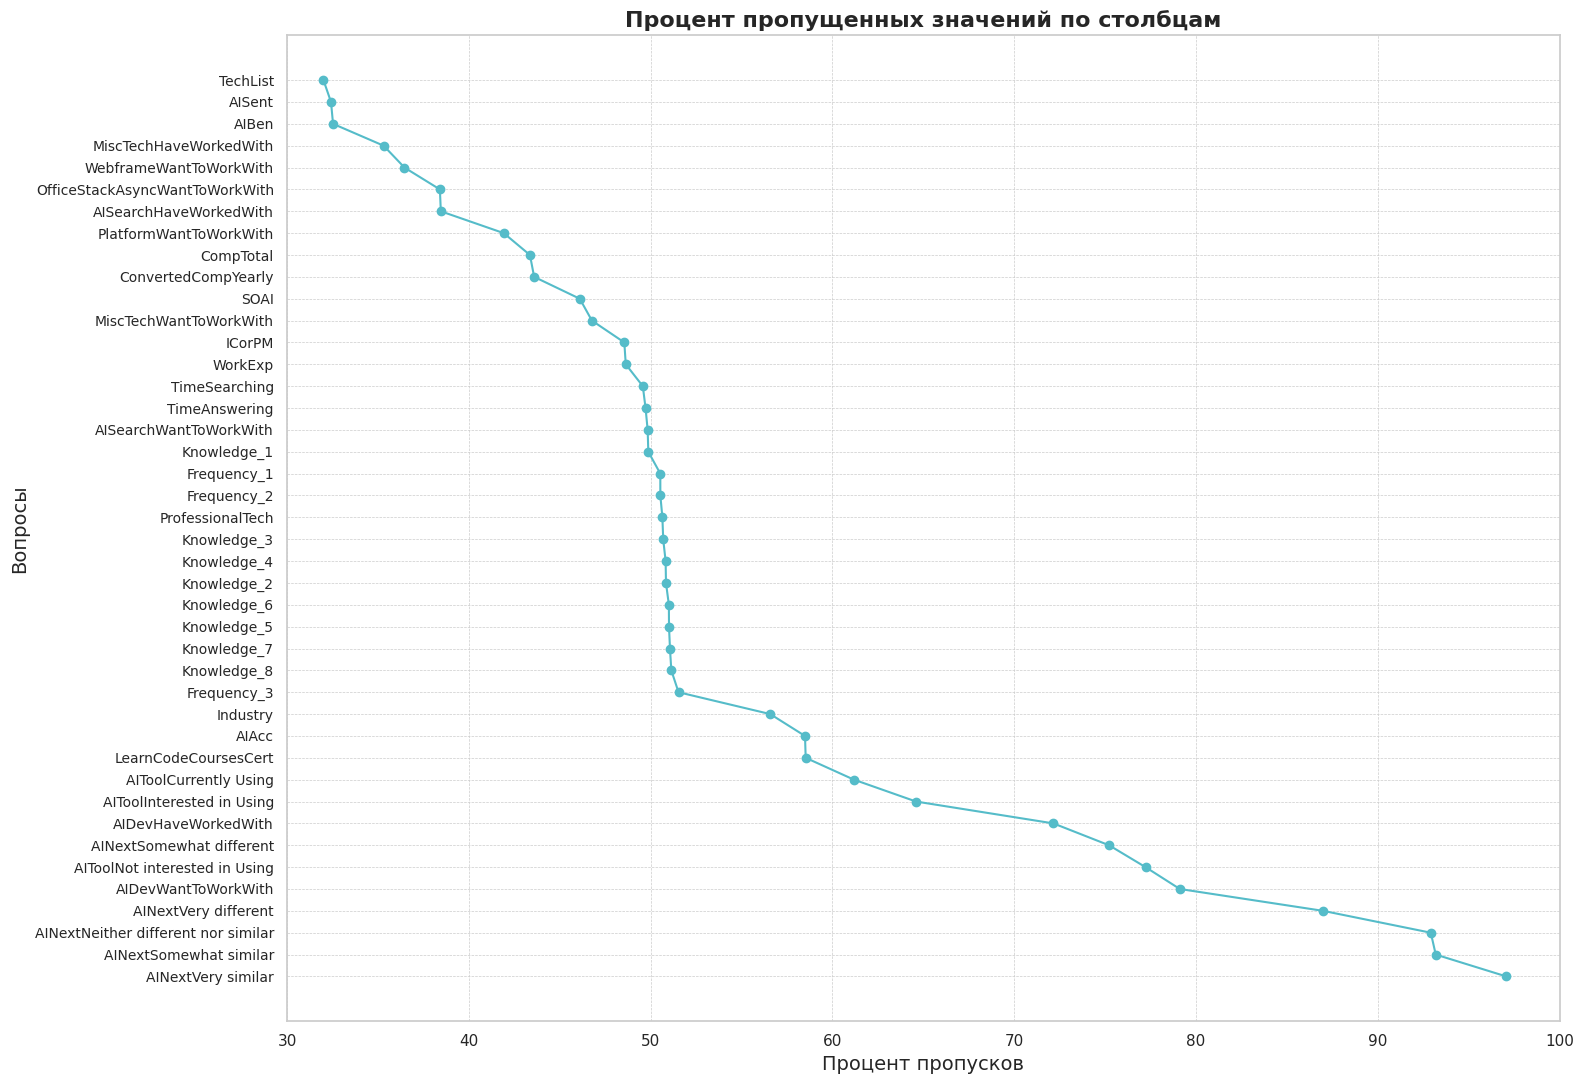

In [123]:
from matplotlib.ticker import MultipleLocator

proportion = df.isnull().mean()
proportion_sorted = proportion.sort_values(ascending=False)

total_columns = len(proportion_sorted)
half_length = total_columns // 2
pr = proportion_sorted.iloc[:half_length]

fig, ax = plt.subplots(figsize=(16, 11))
ax.plot(pr.values*100, pr.index, marker='o', linestyle='-', color='#55BCC9')
ax.set_title('Процент пропущенных значений по столбцам', fontsize=16, fontweight='bold')
ax.set_xlabel('Процент пропусков', fontsize=14)
ax.set_ylabel('Вопросы', fontsize=14)
ax.set_yticks(range(len(pr.index)))
ax.set_xticks(range(len(pr.index)))
ax.set_xlim(30, 100)
ax.set_yticklabels(pr.index, fontsize=10)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.grid(linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Мы можем увидеть, что вопросы про ИИ наиболее пропускаемы. Это может быть связано с тем, что для большинства это все еще довольно новый термин, особенно учитывая, что анализируем мы 2023 год, и потому убирать эти строки я не стану, так как данная информация о незнании довольно ценна для анализа.

**Выводы:** пропусков довольно много. В самых важных переменных: зарплате и опыте работы – их чуть больше половины, так что будем удалять. Больше число пропусков в некоторых вопросах про ИИ, их игнорируем при очистке, причины объяснила выше.

# **3. Анализ способов изучения программирования**

In [124]:
#сначала сделаем для частного случая
print(df['LearnCode'].isna().sum())
LearnCode = df.dropna(subset = ['LearnCode']).copy()
print(len(LearnCode))

1137
68697


In [125]:
LearnCode["LearnCode"].head(10)

,LearnCode
1,Books / Physical media;Colleague;Friend or fam...
2,Books / Physical media;Colleague;On the job tr...
3,Colleague;Friend or family member;Other online...
4,Books / Physical media;Online Courses or Certi...
5,Books / Physical media;Colleague;Online Course...
6,Friend or family member;Online Courses or Cert...
7,Books / Physical media;Online Courses or Certi...
8,Online Courses or Certification;On the job tra...
9,Books / Physical media;Online Courses or Certi...
10,Books / Physical media;Friend or family member...


In [126]:

df = pd.read_csv('/content/survey_results_public.csv')
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.00
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.00
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.00
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.00


In [127]:
def Schools_Universities(df):
  df = df.dropna(subset = ['LearnCode']).copy()
  df['LearnCodeInSchool'] = df['LearnCode'].apply(
    lambda x: 'Yes' if 'School (i.e., University, College, etc)' in str(x) else 'No'
  )
  return df

df = Schools_Universities(df)
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly,LearnCodeInSchool
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.00,Yes
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.00,Yes
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.00,Yes
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.00,Yes
5,6,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,...,1-2 times a week,3-5 times a week,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Observability to...,Other,Appropriate in length,Neither easy nor difficult,96828.00,No


In [128]:
print(df.columns)

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

Text(0, 0.5, 'Количество ответивших')

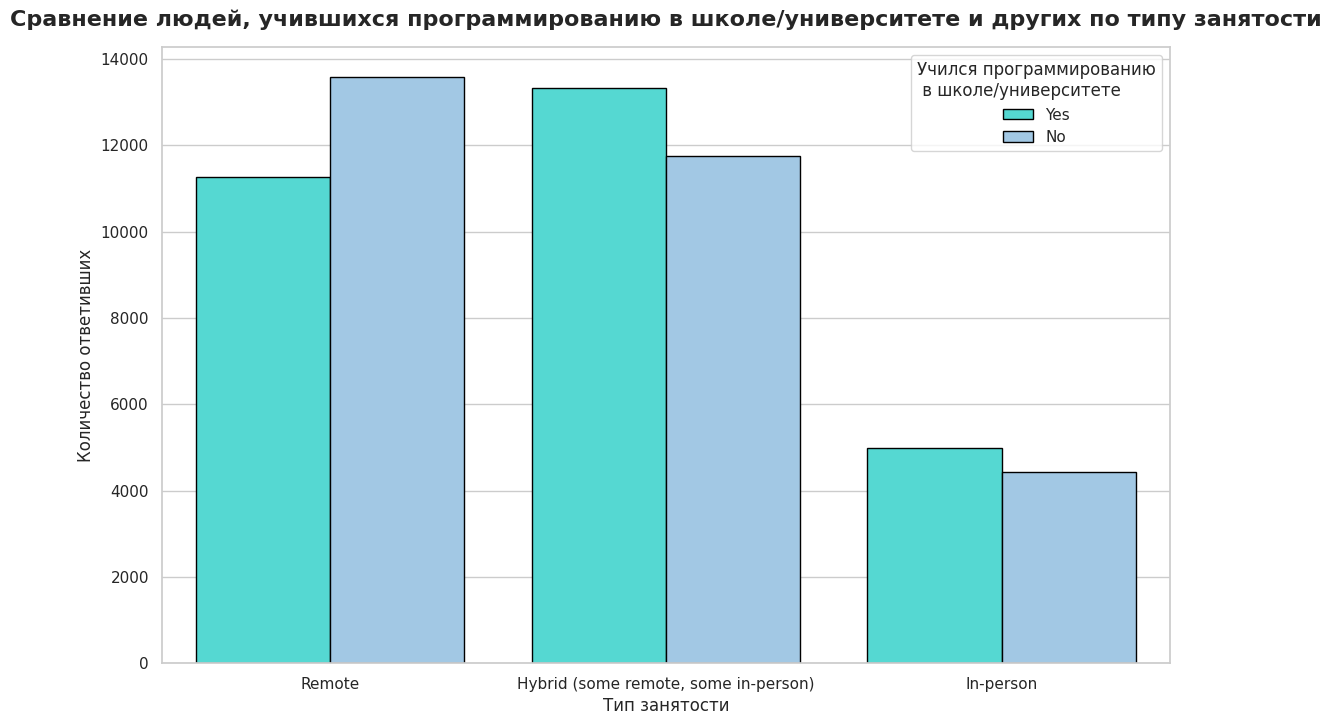

In [129]:
plt.figure(figsize=(13, 8))
custom_palette = sns.color_palette(['#3FEEE6', '#97CAEF'])
sns.countplot(data=df, x='RemoteWork', hue='LearnCodeInSchool', palette=custom_palette) #использован метод hue для группировки

ax = plt.gca()

# Добавление обводки к каждому столбцу
for patch in ax.patches:
    patch.set_edgecolor('black')  # Цвет обводки
    patch.set_linewidth(1)        # Толщина обводки

plt.title('Сравнение людей, учившихся программированию в школе/университете и других по типу занятости', fontsize=16, fontweight='bold', pad = 15)
plt.legend(title='Учился программированию\n в школе/университете')
plt.xlabel('Тип занятости')
plt.ylabel('Количество ответивших')


В основном те, кто учился программированию, работают удаленно.

In [130]:
df = df[df["CompTotal"] < 1000000]
df = df.dropna(subset = ['YearsCodePro']).copy()
df['YearsCodePro'] = df['YearsCodePro'].apply(
    lambda x: int(x) if str(x).isdigit() else (0.5 if str(x) == 'Less than 1 year' else (50.5 if str(x) == 'More than 50 years' else 0))
)
df = df.sort_values(by='YearsCodePro')
print(df['YearsCodePro'].unique())

[ 0.5  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
 14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
 28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
 42.  43.  44.  45.  46.  47.  48.  49.  50.  50.5]


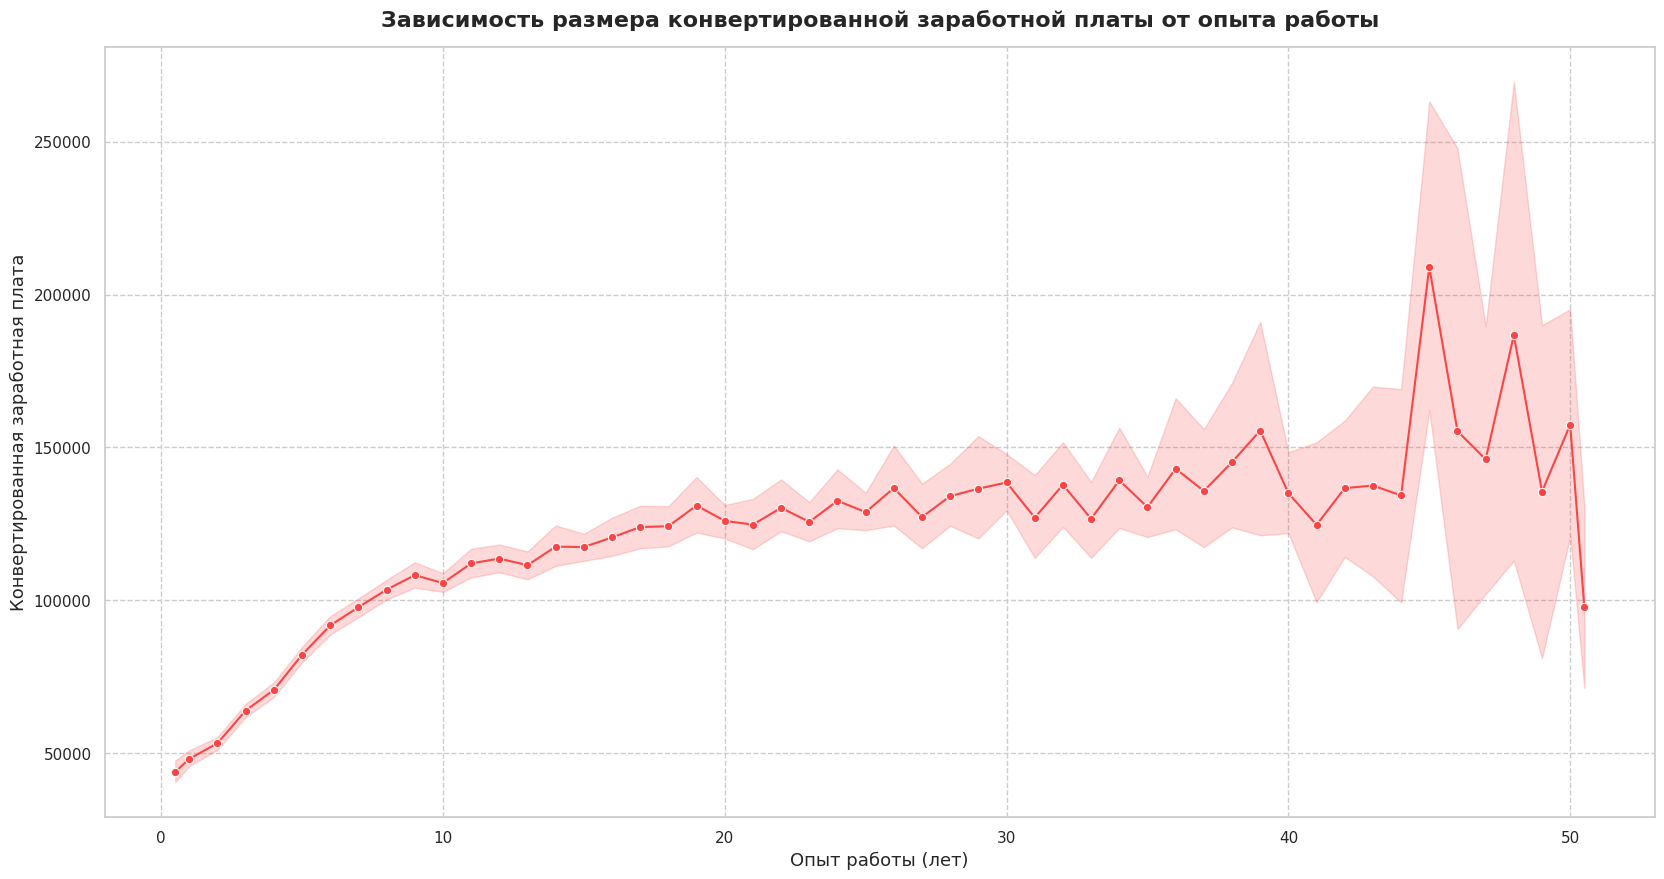

In [131]:

plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x='YearsCodePro', y='ConvertedCompYearly', marker='o', color = '#FC4445')

plt.title('Зависимость размера конвертированной заработной платы от опыта работы', fontsize=16, fontweight='bold', pad = 15)
plt.xlabel('Опыт работы (лет)', fontsize=13)
plt.ylabel('Конвертированная заработная плата', fontsize=13)
plt.grid(True, linestyle='--')


Общее положение: чем больше опыт работы, тем больш зарплата. И если сначала возрастание довольно плавное, то после 40 лет есть очень большой разброс. А также наблюдается резкое падение зарплат после 50 лет.

In [132]:
Y_C_correlation = df['YearsCodePro'].corr(df['ConvertedCompYearly'])
print(f"Коэффициент корреляции между опытом работы и размером заработной платы: {Y_C_correlation}")

Коэффициент корреляции между опытом работы и размером заработной платы: 0.28667868597002294


Линейная зависимость слабая положительная, то есть связь есть, прямо пропорциональная, но несильная.

<ipython-input-133-685787b5f05e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=method_counts.values, y=method_counts.index, palette='viridis')


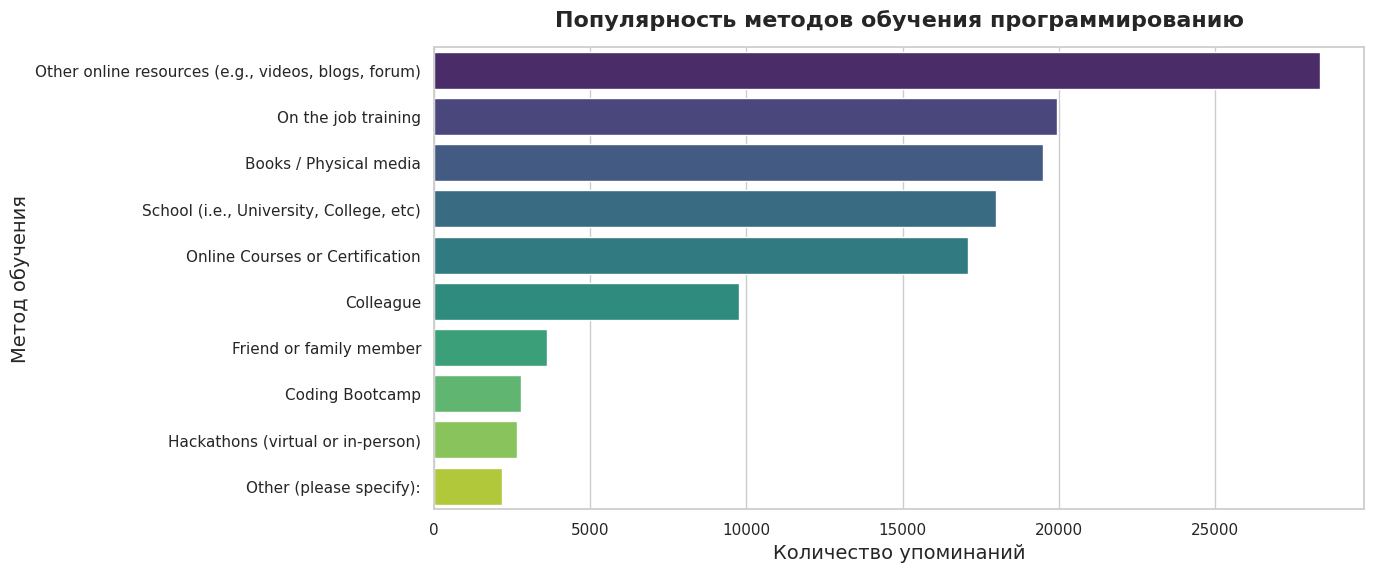

In [133]:

df['LearnCode_Split'] = df['LearnCode'].str.split(';')

df_exploded = df.explode('LearnCode_Split')

method_counts = df_exploded['LearnCode_Split'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=method_counts.values, y=method_counts.index, palette='viridis')
plt.title('Популярность методов обучения программированию', fontsize=16, fontweight='bold', pad = 15)
plt.xlabel('Количество упоминаний', fontsize=14)
plt.ylabel('Метод обучения', fontsize=14)
plt.show()

Онлайн-ресурсы – самые популярные из-за своей доступности.

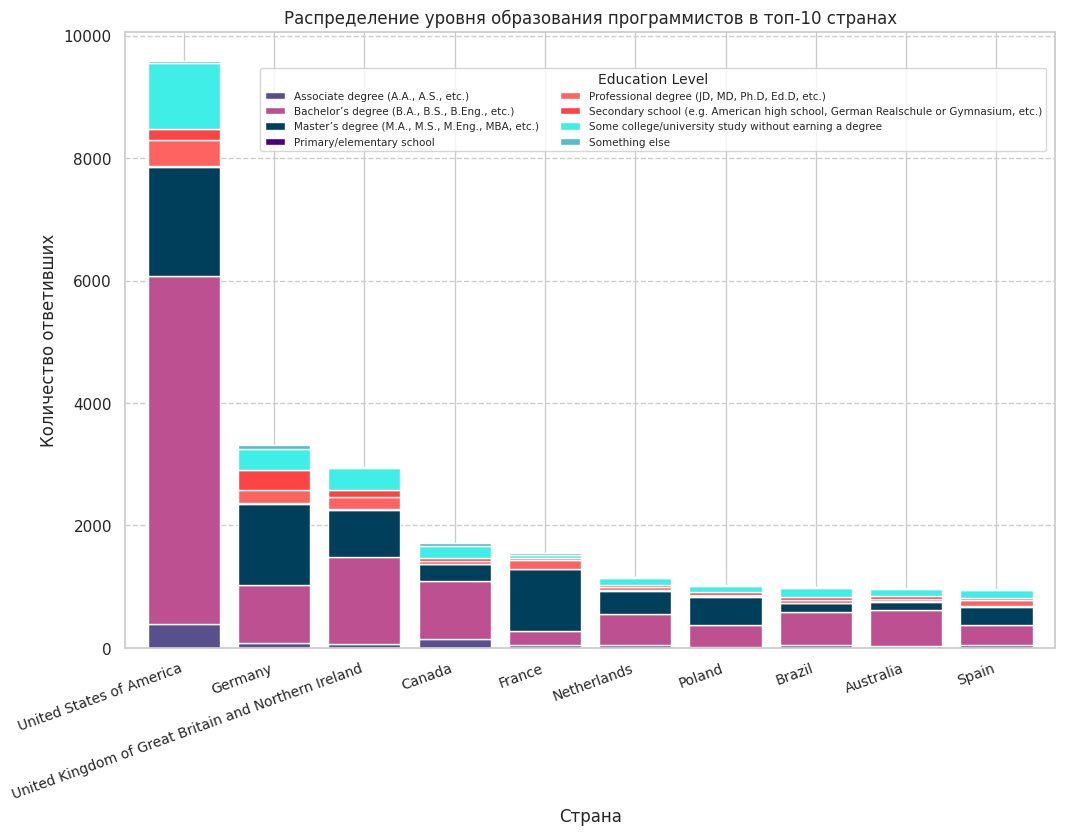

In [134]:
df = df.dropna(subset=['Country', 'EdLevel'])

country_counts = df['Country'].value_counts()
top_10_countries = country_counts.head(10).index

filtered_df = df[df['Country'].isin(top_10_countries)].dropna(subset=['EdLevel', 'Country'])

education_counts = filtered_df.groupby(['Country', 'EdLevel']).size().unstack(fill_value=0)

education_counts = education_counts.loc[education_counts.sum(axis=1).sort_values(ascending=False).index]

custom_colors = [
   '#58508D', '#BC5090', '#003F5C', '#4B0082', '#FF6361',
   '#FC4445', '#3FEEE6', '#55BCC9', '#FFA600', "#2F4B7C"
]

fig, ax = plt.subplots(figsize=(12, 8))
education_counts.plot(kind='bar', stacked=True, color=custom_colors, ax=ax, width = 0.8)

plt.title('Распределение уровня образования программистов в топ-10 странах')
plt.xlabel('Страна')
plt.ylabel('Количество ответивших')

plt.xticks(rotation=20, ha='right', fontsize=10)

legend = plt.legend(title='Education Level', bbox_to_anchor=(0.14, 0.95), loc='upper left', ncol=2, fontsize=7.5)
legend.get_title().set_fontsize('10')

plt.grid(axis='y', linestyle = '--')

Бакалавриат лидируеет почти везде, кроме Германии, Франции и Польши. Там магистров больше, видимо из-за другого подхода к образованию в целом.

<ipython-input-135-1aa59dba77d1>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=filtered_df, x='YearsCodePro', y='ConvertedCompYearly', hue='Country', marker='o', ci=None)


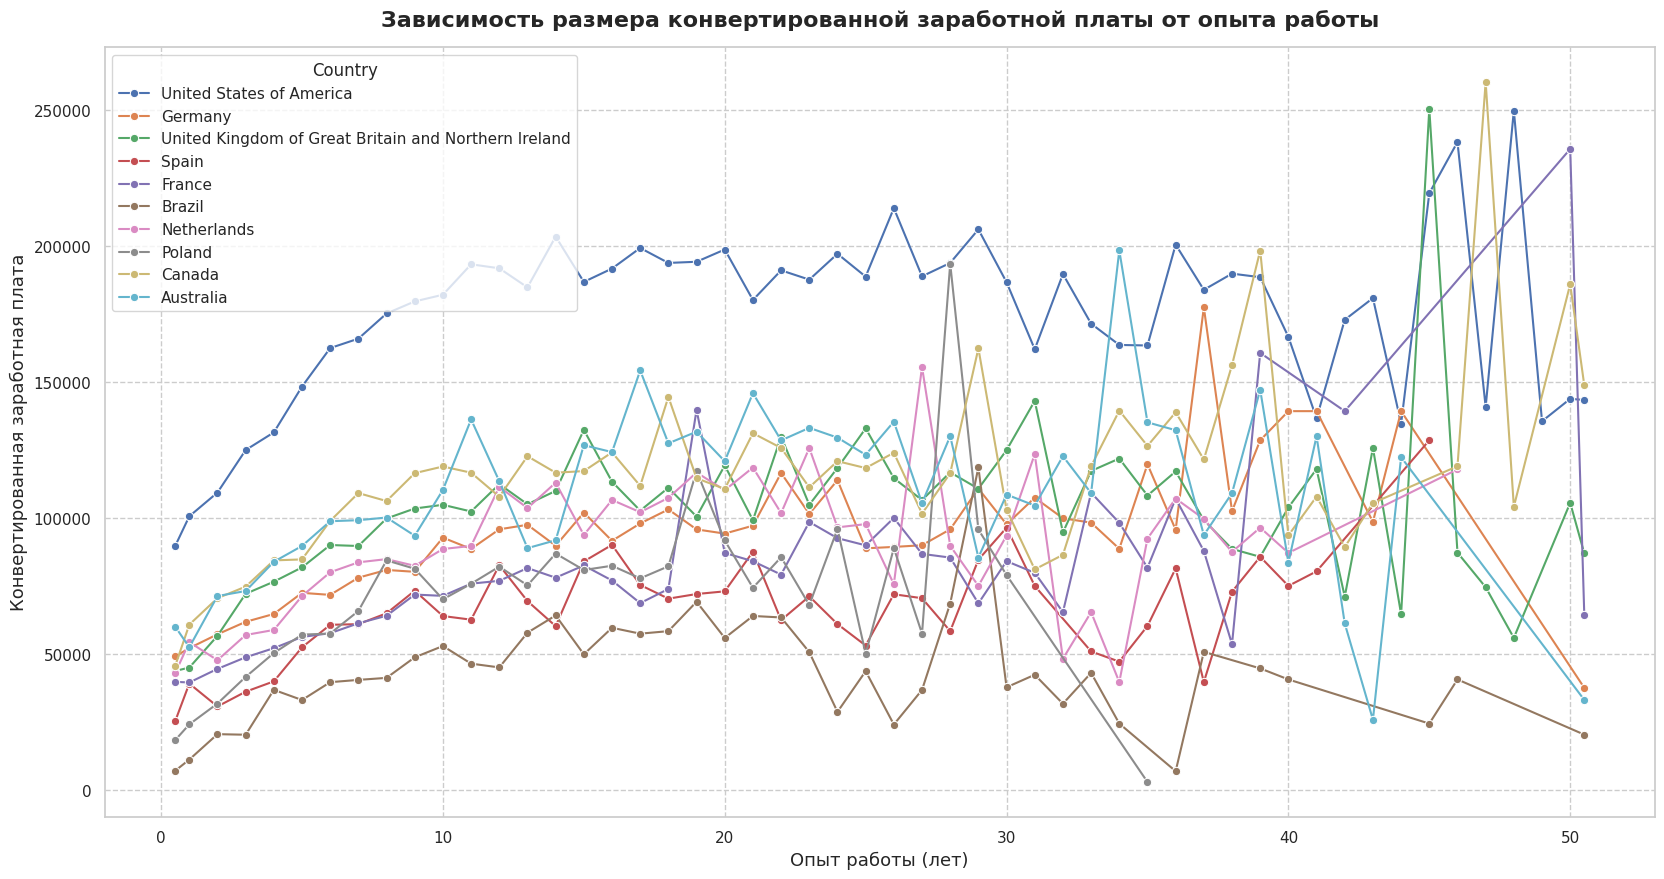

In [135]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=filtered_df, x='YearsCodePro', y='ConvertedCompYearly', hue='Country', marker='o', ci=None)
custom_palette2 = sns.color_palette(custom_colors)
plt.title('Зависимость размера конвертированной заработной платы от опыта работы', fontsize=16, fontweight='bold', pad = 15)
plt.xlabel('Опыт работы (лет)', fontsize=13)
plt.ylabel('Конвертированная заработная плата', fontsize=13)
plt.grid(True, linestyle='--')


В целом рост наблюдается во всех странах. Видно, что в США в цнлом зарплаты сильно выше чем во всех остальных странах. Зависимость не так хорошо прослеживается в Бразилии, где зарплата сначала несильно растет, а потом падает. По Польше данные не очень однородны.

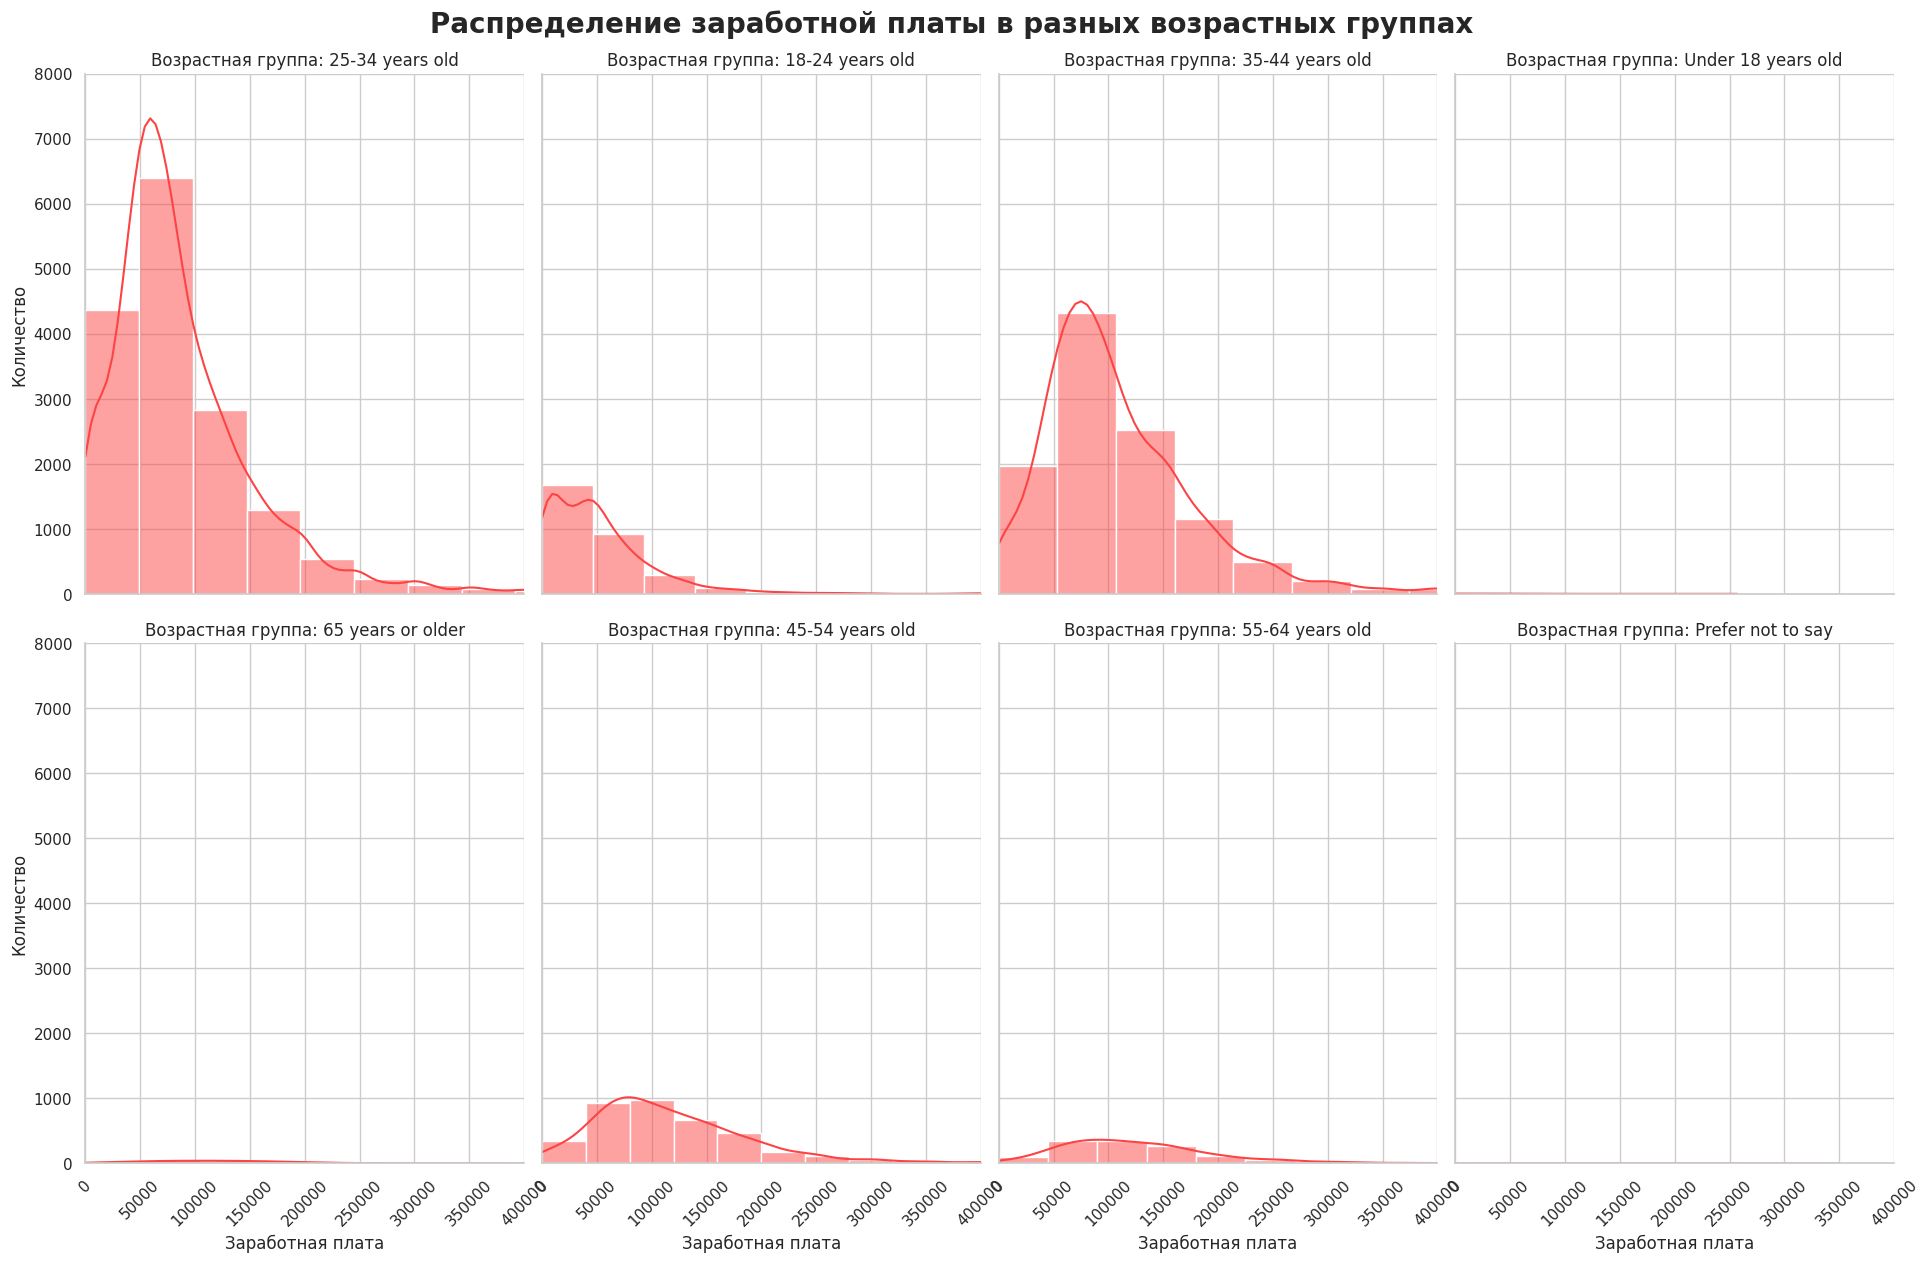

In [138]:
df.dropna(subset=['Age'], inplace=True)
sns.set(style="whitegrid")

# Создание FacetGrid
g = sns.FacetGrid(df, col='Age', col_wrap=4, height=6, aspect = 0.8)

# Построение гистограмм распределения заработной платы
g.map(sns.histplot, 'ConvertedCompYearly', kde=True, bins=20, color='#FC4445')
g.set(xlim=(0, 400000))
g.set(ylim=(0, 8000))

g.set_axis_labels('Заработная плата', 'Количество')
g.set_titles(col_template='Возрастная группа: {col_name}')

g.fig.suptitle('Распределение заработной платы в разных возрастных группах', fontsize=20, fontweight='bold', y=1.02)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)


Можно оценить зарплаты везде, кроме возрастных групп до 18, старше 65, 45-44 и 55-64. Посмторим на них отдельно.

Text(0.5, 1.05, 'Распределение заработной платы в возрастных группах c наименьшей заработной платой')

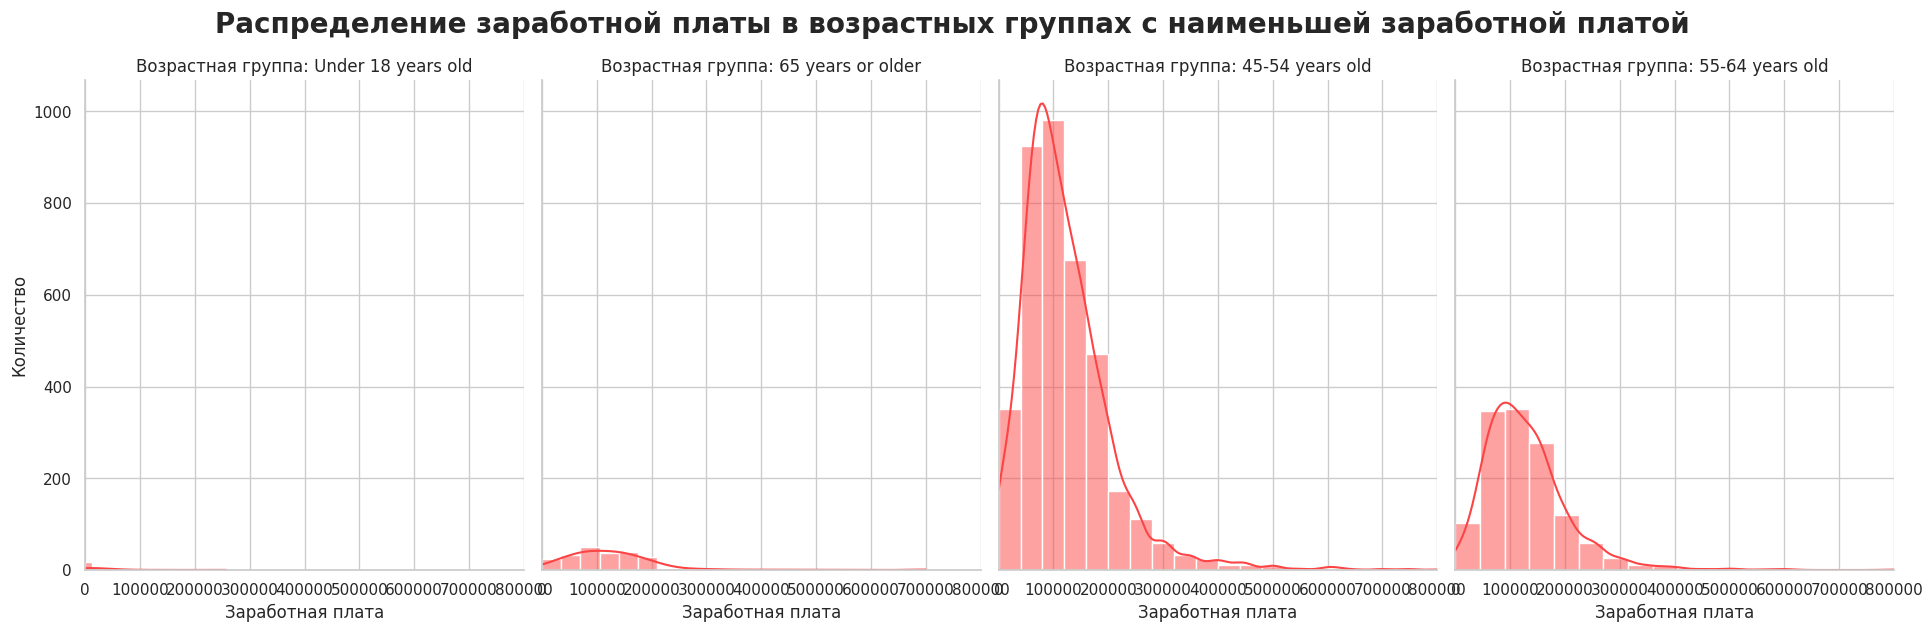

In [76]:
age_categories = [
    'Under 18 years old',
    '55-64 years old',
    '65 years or older',
    '45-54 years old'
]

# Фильтрация DataFrame по указанным возрастным категориям
df_detailed = df[df['Age'].isin(age_categories)]

t = sns.FacetGrid(df_detailed, col='Age', col_wrap=4, height=6, aspect = 0.8)

# Построение гистограмм распределения заработной платы
t.map(sns.histplot, 'ConvertedCompYearly', kde=True, bins=20, color='#FC4445')
t.set(xlim=(0, 800000))

t.set_axis_labels('Заработная плата', 'Количество')
t.set_titles(col_template='Возрастная группа: {col_name}')
t.fig.suptitle('Распределение заработной платы в возрастных группах c наименьшей заработной платой', fontsize=20, fontweight='bold', y=1.05)


In [77]:
age_category = [
    'Under 18 years old',
]
df_detailed2 = df[df['Age'].isin(age_categories)]

(0.0, 800000.0)

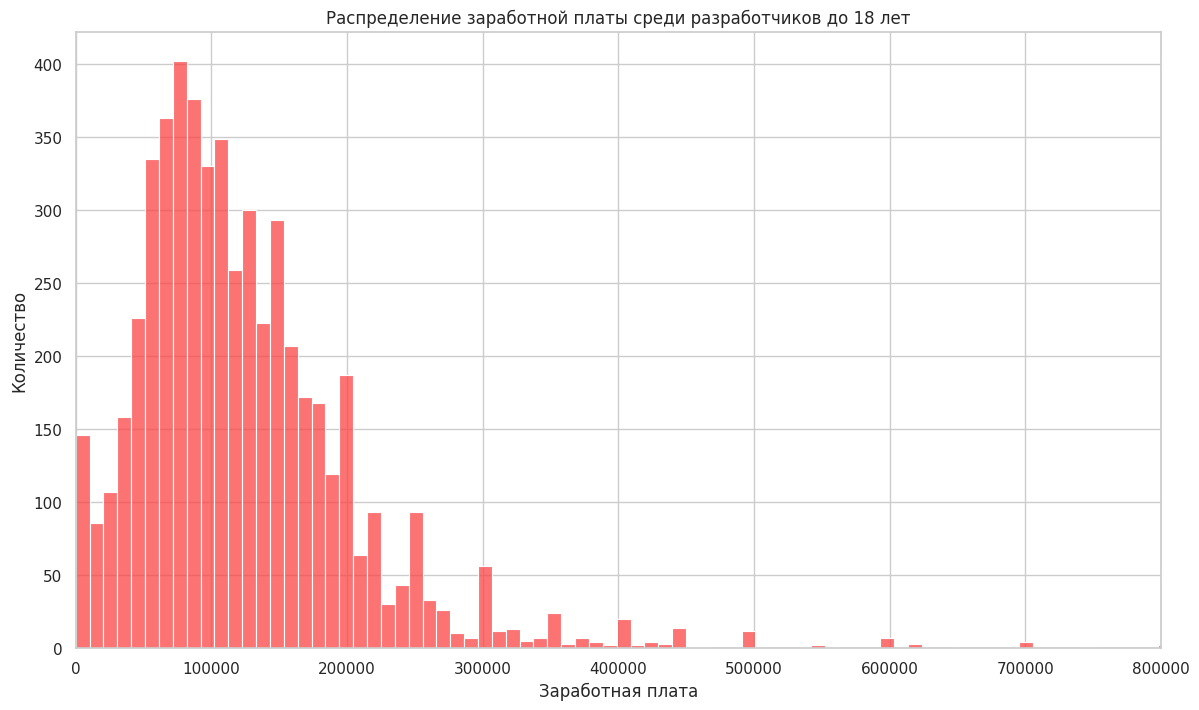

In [78]:
plt.figure(figsize=(14,8))
sns.histplot(data=df_detailed2, x='ConvertedCompYearly', color='#FC4445')
plt.title('Распределение заработной платы среди разработчиков до 18 лет')
plt.xlabel('Заработная плата')
plt.ylabel('Количество')
plt.xlim(0, 800000)

Зарплата у разарботчиков до 18 лет очень низкая по сравнению с остальными, что, наверное, связано с недостатком опыта.

# **4. Анализ изменения уровня заработной платы после пандемии**

Кажется, что пандемия увеличила количество удаленных работников. Посмотрим, как она повлияла на IT-сектор. Рассмотрим статистику за 2019-2023 годы.

In [79]:
df2019 = pd.read_csv('/content/survey_results_public2019.csv', on_bad_lines='skip')
df2020 = pd.read_csv('/content/survey_results_public2020.csv', on_bad_lines='skip')
df2021 = pd.read_csv('/content/survey_results_public2021.csv', on_bad_lines='skip')
df2022 = pd.read_csv('/content/survey_results_public2022.csv', on_bad_lines='skip')
df2023 = pd.read_csv('/content/survey_results_public.csv', on_bad_lines='skip')

In [80]:
print(df2019['Country'].head(7))
print(df2020['Country'].head(7))
print(df2021['Country'].head(7))
print(df2022['Country'].head(7))

0            United Kingdom
1    Bosnia and Herzegovina
2                  Thailand
3             United States
4                   Ukraine
5                    Canada
6                   Ukraine
Name: Country, dtype: object
0               Germany
1        United Kingdom
2    Russian Federation
3               Albania
4         United States
5               Germany
6                 India
Name: Country, dtype: object
0                                             Slovakia
1                                          Netherlands
2                                   Russian Federation
3                                              Austria
4    United Kingdom of Great Britain and Northern I...
5                             United States of America
6                             United States of America
Name: Country, dtype: object
0                                                  NaN
1                                               Canada
2    United Kingdom of Great Britain and Northern I...

In [81]:
countries = ['Germany', 'Poland', 'Russian Federation', 'Thailand', 'Argentina']

In [82]:
print(df2020.columns)


Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [83]:
print(df2021.columns)

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')


In [84]:
print(df2022.columns)

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [85]:
def median(df, countries, name, year):
  dict_needed = {'year': int(year), 'country': [], 'median_salary': []}
  df = df.dropna(subset=['Country', name])
  df = df[df[name] < 1000000]
  for country in countries:
    if df['Country'].isin([country]).any():
      df_country = df[df['Country'] == country]
      dict_needed['country'].append(country)
      dict_needed['median_salary'].append(int(df_country[name].median()))
    else:
      print(f'Разработчики из {country} в опросе не участвовали')
  return pd.DataFrame(dict_needed)
d2019 = median(df2019, countries, 'ConvertedComp', 2019)
d2020 = median(df2020, countries, 'ConvertedComp', 2020)
d2021 = median(df2021, countries, 'ConvertedCompYearly', 2021)
d2022 = median(df2022, countries, 'ConvertedCompYearly', 2022)
d2023 = median(df2023, countries, 'ConvertedCompYearly', 2023)
total = pd.concat([d2019, d2020, d2021, d2022, d2023], axis=0, ignore_index=True)
total


,year,country,median_salary
0,2019,Germany,61870
1,2019,Poland,32064
2,2019,Russian Federation,23832
3,2019,Thailand,23004
4,2019,Argentina,17892
5,2020,Germany,62697
6,2020,Poland,33408
7,2020,Russian Federation,28250
8,2020,Thailand,23064
9,2020,Argentina,17520


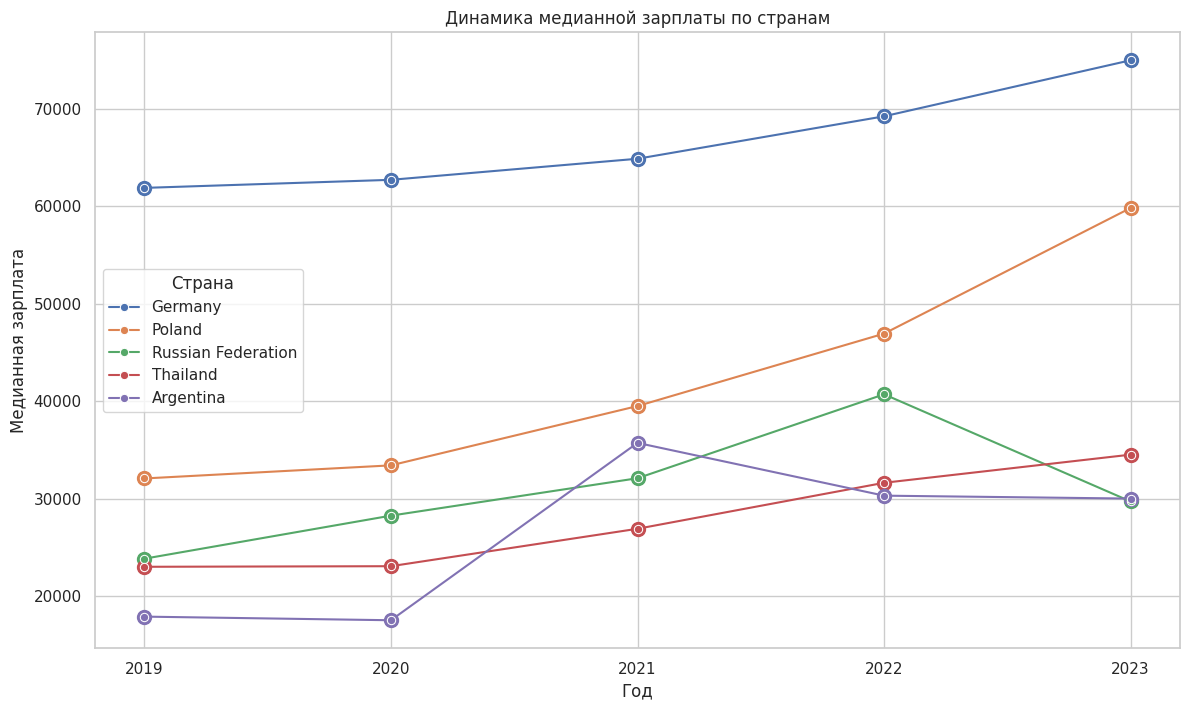

In [89]:
plt.figure(figsize=(14,8))
sns.lineplot(data=total, x = 'year', y = 'median_salary', hue = 'country', marker='o')

years = sorted(total['year'].unique())

plt.xticks(ticks=years, labels=years)

plt.xlabel('Год')
plt.ylabel('Медианная зарплата')
plt.title('Динамика медианной зарплаты по странам')
plt.legend(title='Страна')
plt.grid(True)
for country in total['country'].unique():
    country_data = total[total['country'] == country]
    plt.scatter(country_data['year'], country_data['median_salary'], s=100)


Пандемия сначала резко увеличила зарплату разработчиков(2020-2021), во всех выбранных странах, потом(2021-2022) их зарплата продолжала расти везде, кроме Аргентины, откуда они, видимо, начали иммигрировать. И к окончанию пандемии IT-сектор развился еще в Германии, Польше и Тайланде, слегка регрессировав в России и Аргентине. На России сказался кризис и массовая иммиграция молодых людей, которые в основном и занимали места в IT-секторе.

# **5. Выводы и гипотезы**

Профессиональный опыт сильно влияет на заработную плату. Чем больше человек умеет, тем большие деньши он получает. На графике зависимости WOrkExp и конвертированной заработной платы видно положительную зависимость.

Люди среднего возраста зарабатывают больше всего. На графике видно, что самые высокие зарплаты у возрастной группы 18-24, и чуть ниже у 25-34. В остальных группах они показатели значительно ниже.

Также уровень образования сильно влияет на доход человека. Заметно, что в странах, где преобладают люди с высшим образованием, и более высокие зарплаты по сравнению с остальными.

Видно, что среди разработчиков больше тех, кто работает удаленно. То есть в основном IT-сектор сейчас работает удаленно.

Также, исследовав случайные 5 стран, можно сказать, что пандемия повлияла на развитие IT сетора сильно положительно в каждой из них. А снижение зарплат в некоторых обьясняется лишь кризисными моментами в других областях развития государства.

Нельзя не отметить, что разаработчики в США имеют значительно более аысокую зарплату, чем разработччики в других старанах. Их рассмотренных мною стран, невысокую зарплату имеют Польща и Аргентина.

В качестве дополнительных переменных можно взять место проживание человеа поконкретнее, штат, и выяснить в каком штате зарплаты так сильно поышают среднее по стране. А также неплохо бы проанализировать по полу, и выяснить отличаются ли зарплаты девуш и зарплаты мужчин в такой современной профессии. Это позволит оценить социальную политику, количество работающих женщин и отношение к работающим женщинам в it секторах разных стран.

Гипотезы можно проверить, дтальнее рассмотрев процент трудоустроенных it спеуиалистов после изучения программирования в школе или вузе, проверить действительно ли молодые зарабатывают больше взрослых в этой професии, проведя физический опрос, так как старшее поколение может не хотеть тратить свое время на опросники в интернете.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')